In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, make_scorer


from scipy.interpolate import interp1d
from sklearn.pipeline import Pipeline
from functools import partial


In [412]:
cdc2023 = pd.read_csv(r"data_files\CDC_2023.csv")

In [413]:
cdc2023.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
0,1.0,1.0,b'03012023',b'03',b'01',b'2023',1100.0,b'2023000001',2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,2.0,1.0,1.0,9.0
1,1.0,1.0,b'01062023',b'01',b'06',b'2023',1100.0,b'2023000002',2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,1.0,1.0,9.0
2,1.0,1.0,b'03082023',b'03',b'08',b'2023',1100.0,b'2023000003',2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,1.0,1.0,9.0
3,1.0,1.0,b'03062023',b'03',b'06',b'2023',1100.0,b'2023000004',2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,1.0,1.0,1.0,9.0
4,1.0,1.0,b'01062023',b'01',b'06',b'2023',1100.0,b'2023000005',2.023000e+09,1.0,...,7.000000e+00,1.0,4.700000e+01,1.0,2.0,1.0,2.0,1.0,1.0,2.0


In [414]:
new_list = [
    "IMONTH", "IYEAR", "DISPCODE", "SEXVAR", "PVTRESD3",
    "GENHLTH", "PHYSHLTH", "MENTHLTH", "PRIMINS1", "MEDCOST1", "CHECKUP1",
    "EXERANY2", "EXRACT12", "BPHIGH6", "BPMEDS1", "CHOLCHK3", "TOLDHI3",
    "CHOLMED3", "CVDINFR4", "CVDCRHD4", "CVDSTRK3", "ASTHMA3", "ASTHNOW",
    "CHCCOPD3", "CHCSCNC1", "CHCKDNY2", "HAVARTH4", "DIABETE4", "DIABAGE4",
    "MARITAL", "EDUCA", "CHILDREN", "INCOME3", "PREGNANT", "WEIGHT2",
    "HEIGHT3", "DECIDE", "DEAF", "SMOKE100", "SMOKDAY2", "USENOW3",
    "ECIGNOW2", "ALCDAY4", "AVEDRNK3", "DRNK3GE5", "HIVTST7", "PDIABTS1",
    "PREDIAB2", "DIABTYPE", "INSULIN1", "CHKHEMO3", "EYEEXAM1", "DIABEYE1",
    "FEETSORE", "STOPSMK2", "HASYMP1", "HASYMP2", "HASYMP3", "HASYMP4",
    "HASYMP5", "HASYMP6", "STRSYMP1", "STRSYMP2", "STRSYMP3", "STRSYMP4",
    "STRSYMP5", "STRSYMP6", "ACEDRINK", "SDLONELY", "_BMI5CAT", "_AGEG5YR"
]


In [415]:
cdc2023 = cdc2023[new_list]

In [416]:
cdc2023.tail()

,IMONTH,IYEAR,DISPCODE,SEXVAR,PVTRESD3,GENHLTH,PHYSHLTH,MENTHLTH,PRIMINS1,MEDCOST1,...,STRSYMP1,STRSYMP2,STRSYMP3,STRSYMP4,STRSYMP5,STRSYMP6,ACEDRINK,SDLONELY,_BMI5CAT,_AGEG5YR
433318,b'12',b'2023',1100.0,1.0,1.0,3.0,12.0,30.0,77.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,10.0
433319,b'01',b'2024',1100.0,2.0,1.0,2.0,88.0,88.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0
433320,b'12',b'2023',1100.0,2.0,1.0,2.0,10.0,88.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,7.0
433321,b'12',b'2023',1100.0,2.0,1.0,3.0,88.0,88.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,10.0
433322,b'12',b'2023',1100.0,1.0,1.0,5.0,2.0,88.0,88.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0


In [417]:
cdc2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433323 entries, 0 to 433322
Data columns (total 71 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   IMONTH    433323 non-null  object 
 1   IYEAR     433323 non-null  object 
 2   DISPCODE  433323 non-null  float64
 3   SEXVAR    433323 non-null  float64
 4   PVTRESD3  344978 non-null  float64
 5   GENHLTH   433319 non-null  float64
 6   PHYSHLTH  433320 non-null  float64
 7   MENTHLTH  433320 non-null  float64
 8   PRIMINS1  433318 non-null  float64
 9   MEDCOST1  433321 non-null  float64
 10  CHECKUP1  433321 non-null  float64
 11  EXERANY2  433321 non-null  float64
 12  EXRACT12  325227 non-null  float64
 13  BPHIGH6   433320 non-null  float64
 14  BPMEDS1   176222 non-null  float64
 15  CHOLCHK3  433320 non-null  float64
 16  TOLDHI3   381511 non-null  float64
 17  CHOLMED3  379883 non-null  float64
 18  CVDINFR4  433320 non-null  float64
 19  CVDCRHD4  433320 non-null  float64
 20  CVDS

In [418]:
cdc2023.describe()

,DISPCODE,SEXVAR,PVTRESD3,GENHLTH,PHYSHLTH,MENTHLTH,PRIMINS1,MEDCOST1,CHECKUP1,EXERANY2,...,STRSYMP1,STRSYMP2,STRSYMP3,STRSYMP4,STRSYMP5,STRSYMP6,ACEDRINK,SDLONELY,_BMI5CAT,_AGEG5YR
count,433323.000000,433323.000000,344978.000000,433319.000000,433320.000000,433320.000000,433318.000000,433321.000000,433321.000000,433321.000000,...,10438.000000,10424.000000,10416.000000,10403.000000,10391.000000,10375.000000,55939.000000,225998.000000,392788.000000,433323.000000
mean,1117.783963,1.529723,1.003913,2.629645,58.477843,58.022037,10.865293,1.933550,1.434567,1.265353,...,1.317973,1.199156,2.232239,2.711237,1.525551,2.284819,1.855289,4.042461,2.999674,7.836318
std,38.237812,0.499116,0.062434,1.081803,37.734401,37.989494,24.899418,0.436001,1.136273,0.548392,...,1.301882,1.037369,2.318748,2.329941,1.617903,2.290948,0.915790,1.050912,0.834410,3.694292
min,1100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1100.000000,1.000000,1.000000,2.000000,14.000000,10.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,5.000000
50%,1100.000000,2.000000,1.000000,3.000000,88.000000,88.000000,3.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,4.000000,3.000000,8.000000
75%,1100.000000,2.000000,1.000000,3.000000,88.000000,88.000000,5.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,5.000000,4.000000,11.000000
max,1200.000000,2.000000,2.000000,9.000000,99.000000,99.000000,99.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,4.000000,14.000000


In [419]:
df_duplicates = cdc2023.duplicated()
print("Duplicate rows in data:")
print(df_duplicates.value_counts())

Duplicate rows in data:
False    433318
True          5
Name: count, dtype: int64


In [420]:
df_duplicates_rows = cdc2023[cdc2023.duplicated(keep=False)]

df_duplicates_rows

,IMONTH,IYEAR,DISPCODE,SEXVAR,PVTRESD3,GENHLTH,PHYSHLTH,MENTHLTH,PRIMINS1,MEDCOST1,...,STRSYMP1,STRSYMP2,STRSYMP3,STRSYMP4,STRSYMP5,STRSYMP6,ACEDRINK,SDLONELY,_BMI5CAT,_AGEG5YR
31948,b'05',b'2023',1100.0,1.0,1.0,9.0,99.0,99.0,99.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,14.0
32008,b'05',b'2023',1100.0,1.0,1.0,9.0,99.0,99.0,99.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,14.0
32321,b'05',b'2023',1100.0,1.0,1.0,9.0,99.0,99.0,99.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,14.0
102268,b'04',b'2023',1200.0,2.0,1.0,1.0,88.0,88.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
172725,b'04',b'2023',1200.0,2.0,1.0,1.0,88.0,88.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
284323,b'08',b'2023',1200.0,2.0,1.0,2.0,88.0,88.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
375280,b'06',b'2023',1100.0,1.0,1.0,1.0,1.0,10.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0
375281,b'06',b'2023',1100.0,1.0,1.0,1.0,1.0,10.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0
416278,b'08',b'2023',1200.0,2.0,1.0,2.0,88.0,88.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


In [421]:
cdc2023.drop_duplicates(inplace=True)

print('Duplicates on data removed. Number of rows remaining:', cdc2023.shape[0])

Duplicates on data removed. Number of rows remaining: 433318


In [422]:
# renaming columns for training and test datasets
cdc2023.rename(columns={"IMONTH" :"interview_month",
                         "IYEAR" : "interview_year",
                          "DISPCODE" : "final_dispcode", 
                          "CADULT1" : "cell_adult1",
                          "SEXVAR" : "sex_var",
                          "PVTRESD3" : "private_residence3",
                          "GENHLTH" : "general_health", 
                          "PHYSHLTH" : "phys_health",
                          "MENTHLTH" : "mental_health",
                          "PRIMINS1" : "prim_insurance",
                          "MEDCOST1" : "med_cost",
                          "CHECKUP1" : "checkup1",
                          "EXERANY2" : "exer_any2",
                          "EXRACT12" : "physical_act12",
                          "BPHIGH6" : "bp_high", 
                          "BPMEDS1" : "bp_meds1",
                          "CHOLCHK3" : "chol_check3",
                          "TOLDHI3" : "told_chol_high3",
                          "CHOLMED3" : "chol_med3",
                          "CVDINFR4" : "diagnosed_heart_attack4",
                          "CVDCRHD4" : "diagnosed_angina_or_cor_heart",
                          "CVDSTRK3" : "diagosed_stroke3", 
                          "ASTHMA3" : "asthma3", 
                          "ASTHNOW" : "asth_now",
                          "CHCCOPD3" : "copd_emphysema_or_chronic_bronchitis",
                          "CHCSCNC1" : "skin_cancer_not_melanoma", 
                          "CHCKDNY2" : "told_kidney_disease",
                          "HAVARTH4" : "told_arthritis",
                          "DIABETE4" : "diabetes4", 
                          "DIABAGE4" : "age_diabetes4",
                          "MARITAL" : "marital", 
                          "EDUCA" : "education", 
                          "CHILDREN" : "children",
                          "INCOME3" : "income3", 
                          "PREGNANT" : "pregnancy",
                          "WEIGHT2" : "weight_pounds",
                          "HEIGHT3" : "height_feet_inches", 
                          "DECIDE" : "difficulty_concentrating_or_remembering", 
                          "DEAF" : "deaf_or_diffi_hearing",
                          "SMOKE100" : "smoked_100cigarettes", 
                          "SMOKDAY2" : "smokeday2",
                          "USENOW3" : "smokeless_tobacco",
                          "ECIGNOW2": "e-cigars_or_vaping",
                          "ALCDAY4" : "alco_days", 
                          "AVEDRNK3": "avg_alco_per_day", 
                          "DRNK3GE5" : "binge_drinking",
                          "HIVTST7" : "ever_tested_HIV", 
                          "PDIABTS1" : "when_last_high_blood_sugar_test",
                          "PREDIAB2" : "prediabetes_or_borderline_diabetes",
                          "DIABTYPE" : "diabetes_type",
                          "INSULIN1" : "insulin", 
                          "CHKHEMO3" : "times_Checked_glyco_hemoglobin",
                          "EYEEXAM1" : "eye_exam_pupil_dilated", 
                          "DIABEYE1" : "back_eye_photo",
                          "FEETSORE" : "feet_sores_irritation",
                          "STOPSMK2" : "no_smoking_in_12months",
                          "HASYMP1"  : "heart_attack_symptoms_neck",
                          "HASYMP2" : "heart_attack_symptoms_faint", 
                          "HASYMP3" : "heart_attack_symptoms_chest", 
                          "HASYMP4" : "heart_attack_symptoms_vision",
                          "HASYMP5" : "heart_attack_symptoms_arms",
                          "HASYMP6" : "heart_attack_symptoms_breath_shortness",
                          "STRSYMP1" : "stroke_symptoms_confusion",
                          "STRSYMP2" : "stroke_symtoms_numbness", 
                          "STRSYMP3" : "stroke_symptoms_vision",
                          "STRSYMP4" : "stroke_symptoms_chest",
                          "STRSYMP5" : "stroke_symptoms_dizziness",
                          "STRSYMP6" : "stroke_symptoms_headache",
                          "ACEDRINK" : "live_with_alcoholic", 
                          "SDLONELY" : "feel_lonely", 
                          "_BMI5CAT" : "bmi_categories",
                          "_AGEG5YR" : "age"},
                inplace= True)

In [423]:
cdc2023.sample(7)

,interview_month,interview_year,final_dispcode,sex_var,private_residence3,general_health,phys_health,mental_health,prim_insurance,med_cost,...,stroke_symptoms_confusion,stroke_symtoms_numbness,stroke_symptoms_vision,stroke_symptoms_chest,stroke_symptoms_dizziness,stroke_symptoms_headache,live_with_alcoholic,feel_lonely,bmi_categories,age
433299,b'01',b'2024',1100.0,2.0,1.0,1.0,1.0,10.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0
90377,b'06',b'2023',1100.0,2.0,1.0,3.0,30.0,88.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,8.0
269033,b'03',b'2023',1100.0,1.0,1.0,2.0,88.0,88.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0
127103,b'09',b'2023',1100.0,2.0,NaN,4.0,5.0,88.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,12.0
406779,b'09',b'2023',1100.0,2.0,1.0,2.0,88.0,30.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,4.0
388376,b'04',b'2023',1100.0,2.0,1.0,4.0,10.0,10.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,13.0
132543,b'02',b'2023',1100.0,1.0,1.0,4.0,88.0,88.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,13.0


In [424]:
# ProfileReport(cdc2023)

In [425]:
# These columns are dropped as they have too many missing values or are not relevant for the project topic or extremely high correlation with other relevant variables.

columns_to_drop = ["private_residence3", "asth_now", "binge_drinking", "back_eye_photo", "feet_sores_irritation", "heart_attack_symptoms_neck", 
                   "heart_attack_symptoms_faint", "heart_attack_symptoms_chest", "heart_attack_symptoms_vision", "heart_attack_symptoms_arms",
                   "heart_attack_symptoms_breath_shortness", "stroke_symptoms_confusion", "stroke_symtoms_numbness", "stroke_symptoms_vision", 
                   "stroke_symptoms_chest", "stroke_symptoms_dizziness", "stroke_symptoms_headache", "live_with_alcoholic", "ever_tested_HIV"]


# Dropping Specified Columns
cdc2023.drop(columns=columns_to_drop, axis=1, inplace=True)

In [426]:
cdc2023.sample(10)

,interview_month,interview_year,final_dispcode,sex_var,general_health,phys_health,mental_health,prim_insurance,med_cost,checkup1,...,when_last_high_blood_sugar_test,prediabetes_or_borderline_diabetes,diabetes_type,insulin,times_Checked_glyco_hemoglobin,eye_exam_pupil_dilated,no_smoking_in_12months,feel_lonely,bmi_categories,age
44140,b'12',b'2023',1100.0,2.0,2.0,2.0,8.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0
399053,b'10',b'2023',1100.0,1.0,2.0,3.0,2.0,1.0,2.0,3.0,...,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
62727,b'03',b'2023',1100.0,2.0,1.0,88.0,88.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,14.0
323538,b'06',b'2023',1100.0,2.0,2.0,88.0,88.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0
29163,b'10',b'2023',1100.0,1.0,4.0,5.0,2.0,2.0,1.0,2.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,9.0
13635,b'04',b'2023',1100.0,2.0,2.0,88.0,88.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,10.0
98422,b'09',b'2023',1100.0,1.0,2.0,88.0,88.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,5.0
100350,b'12',b'2023',1100.0,1.0,2.0,30.0,5.0,3.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,12.0
48250,b'01',b'2024',1100.0,1.0,2.0,3.0,88.0,3.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,11.0
53345,b'01',b'2024',1100.0,2.0,1.0,88.0,88.0,3.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,10.0


In [427]:
# # Function to obtain percentages of missing values
def percent_missing(df):
    nan_percent = 100 * df.isnull().sum() / len(df)
    nan_percent = nan_percent[nan_percent > 0].sort_values()

    return nan_percent

# Function to plot out missing value percentages by column
def show_percent_missing(df):
    nan_percent = percent_missing(df)

    sns.barplot(x=nan_percent.index, y=nan_percent)
    plt.xticks(rotation=90)
    plt.ylabel('Missing Percentage %')
    plt.xlabel('Variables')


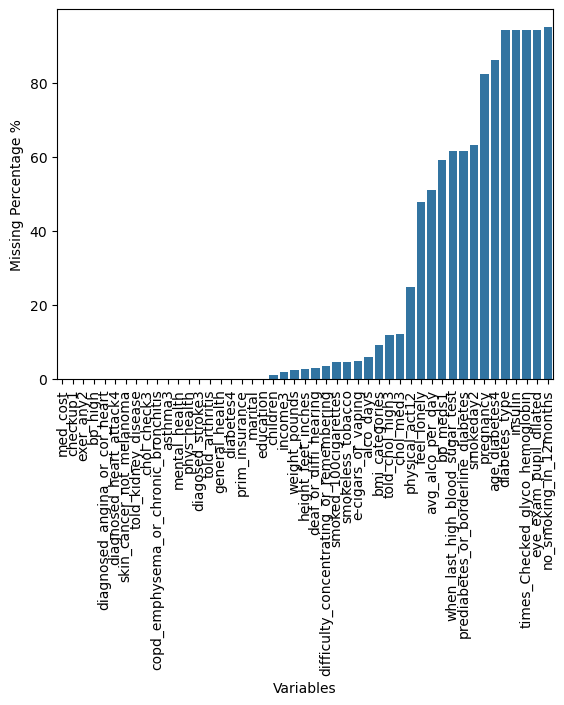

In [428]:
show_percent_missing(cdc2023)

In [429]:
cdc2023.head()

,interview_month,interview_year,final_dispcode,sex_var,general_health,phys_health,mental_health,prim_insurance,med_cost,checkup1,...,when_last_high_blood_sugar_test,prediabetes_or_borderline_diabetes,diabetes_type,insulin,times_Checked_glyco_hemoglobin,eye_exam_pupil_dilated,no_smoking_in_12months,feel_lonely,bmi_categories,age
0,b'03',b'2023',1100.0,2.0,2.0,88.0,88.0,3.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,13.0
1,b'01',b'2023',1100.0,2.0,2.0,88.0,88.0,3.0,2.0,2.0,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,3.0,13.0
2,b'03',b'2023',1100.0,2.0,4.0,6.0,2.0,3.0,1.0,1.0,...,1.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,13.0
3,b'03',b'2023',1100.0,2.0,2.0,2.0,88.0,3.0,2.0,3.0,...,1.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,3.0,12.0
4,b'01',b'2023',1100.0,2.0,4.0,88.0,88.0,3.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,12.0


In [430]:
cols_to_fill = ["physical_act12", "difficulty_concentrating_or_remembering", "deaf_or_diffi_hearing", "smoked_100cigarettes", "smokeday2", "smokeless_tobacco", 
                "e-cigars_or_vaping", "alco_days", "when_last_high_blood_sugar_test", "feel_lonely", "bmi_categories"]

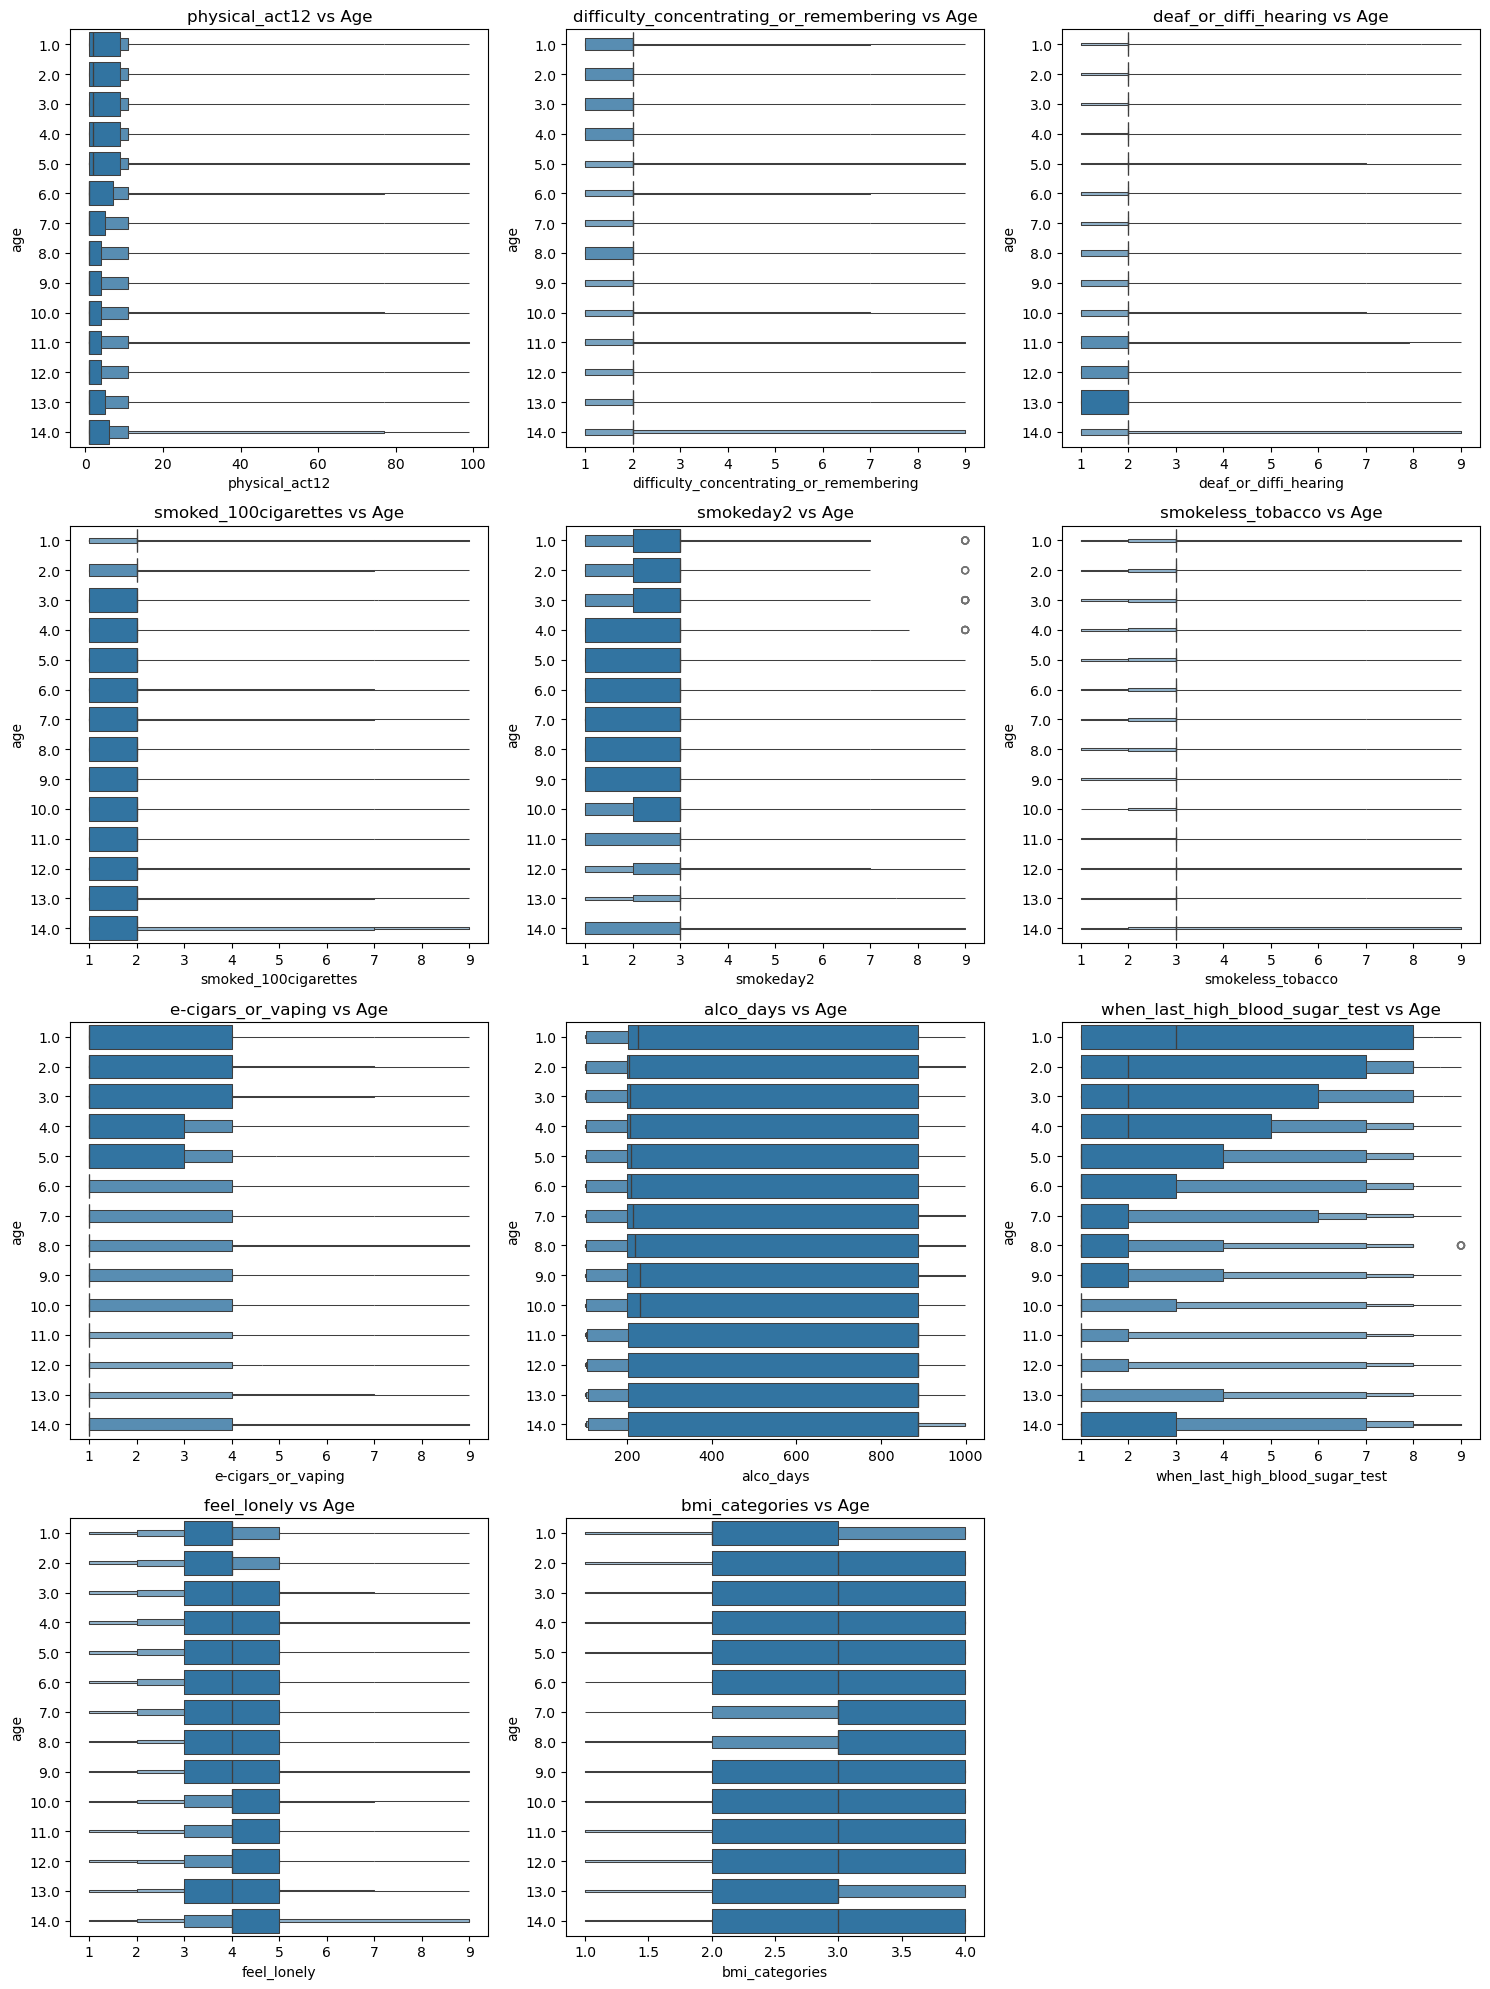

In [431]:
# Creating Subplots Grid

fig, axes = plt.subplots(nrows=(len(cols_to_fill) // 3) + 1, ncols=3, figsize=(15, 5 * ((len(cols_to_fill) // 3) + 1)))

# Flattening axes for easy iteration
axes = axes.flatten()

# plotting each numeric column against 'SalePrice'
for i, col in enumerate(cols_to_fill):
    sns.boxenplot(x=cdc2023[col], y =cdc2023['age'], ax=axes[i], orient='h')
    axes[i].set_title(f'{col} vs Age')

# Hiding any extra subplots where numeric columns are not a multiple of 3
for i in range(len(cols_to_fill), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [432]:
# Filling the type of physical activity with the mode based on the age group
cdc2023['physical_act12'] = cdc2023.groupby('age')['physical_act12'].transform(lambda value: value.fillna(value.mode().iloc[0]))

# Filling the difficulty_concentrating variable with the mode based on the age group
cdc2023['difficulty_concentrating_or_remembering'] = cdc2023.groupby('age')['difficulty_concentrating_or_remembering'].transform(lambda value: value.fillna(value.mode().iloc[0]))

# Filling the deaf_or_diffi_hearing variable with the mode based on the age group
cdc2023['deaf_or_diffi_hearing'] = cdc2023.groupby('age')['deaf_or_diffi_hearing'].transform(lambda value: value.fillna(value.mode().iloc[0]))

# Filling the smoked_100cigarettes variable with the mode based on the age group
cdc2023['smoked_100cigarettes'] = cdc2023.groupby('age')['smoked_100cigarettes'].transform(lambda value: value.fillna(value.mode().iloc[0]))

# Filling the smokeday2 variable with the mode based on the age group
cdc2023['smokeday2'] = cdc2023.groupby('age')['smokeday2'].transform(lambda value: value.fillna(value.mode().iloc[0]))

# Filling the smokeless_tobacco variable with the mode based on the age group
cdc2023['smokeless_tobacco'] = cdc2023.groupby('age')['smokeless_tobacco'].transform(lambda value: value.fillna(value.mode().iloc[0]))

# Filling the e-cigars_or_vaping variable with the mode based on the age group
cdc2023['e-cigars_or_vaping'] = cdc2023.groupby('age')['e-cigars_or_vaping'].transform(lambda value: value.fillna(value.mode().iloc[0]))

# Filling the alco_days variable with the mode based on the age group
cdc2023['alco_days'] = cdc2023.groupby('age')['alco_days'].transform(lambda value: value.fillna(value.mode().iloc[0]))

# Filling the when_last_high_blood_sugar_test variable with the mode based on the age group
cdc2023['when_last_high_blood_sugar_test'] = cdc2023.groupby('age')['when_last_high_blood_sugar_test'].transform(lambda value: value.fillna(value.mode().iloc[0]))

cdc2023.sample(6)

,interview_month,interview_year,final_dispcode,sex_var,general_health,phys_health,mental_health,prim_insurance,med_cost,checkup1,...,when_last_high_blood_sugar_test,prediabetes_or_borderline_diabetes,diabetes_type,insulin,times_Checked_glyco_hemoglobin,eye_exam_pupil_dilated,no_smoking_in_12months,feel_lonely,bmi_categories,age
201753,b'11',b'2023',1100.0,1.0,1.0,88.0,88.0,1.0,2.0,1.0,...,1.0,NaN,2.0,2.0,2.0,2.0,NaN,5.0,2.0,9.0
356410,b'10',b'2023',1100.0,1.0,2.0,3.0,15.0,1.0,2.0,3.0,...,8.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,4.0
302148,b'04',b'2023',1200.0,1.0,1.0,88.0,88.0,88.0,1.0,3.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,9.0
126827,b'01',b'2023',1100.0,2.0,2.0,88.0,88.0,3.0,2.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,13.0
11703,b'11',b'2023',1200.0,2.0,3.0,88.0,88.0,3.0,2.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,13.0
267584,b'11',b'2023',1100.0,2.0,3.0,88.0,88.0,5.0,2.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,9.0


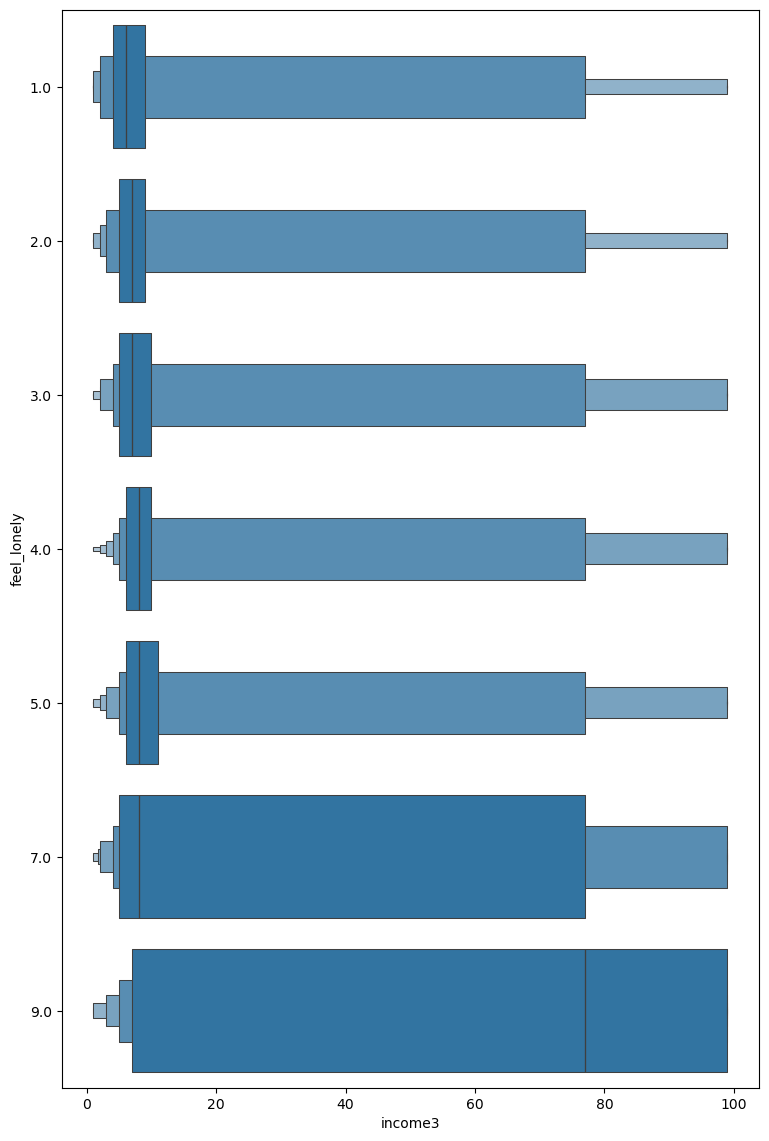

In [433]:
# Assuming income has some association with feeling lonely

plt.figure(figsize=(9, 14))
sns.boxenplot(x='income3', y="feel_lonely", data=cdc2023, orient='h')
plt.xlabel('income3')
plt.ylabel("feel_lonely");

In [434]:
# Filling the feel_lonely variable with the mode based on the age group and income level
cdc2023['feel_lonely'] = cdc2023.groupby(['age', 'income3'])['feel_lonely'].transform(lambda value: value.fillna(value.mode().iloc[0]))

# Filling the feel_lonely variable with the mode based on the age group
cdc2023['feel_lonely'] = cdc2023.groupby(['age'])['feel_lonely'].transform(lambda value: value.fillna(value.mode().iloc[0]))

cdc2023.sample(6)

,interview_month,interview_year,final_dispcode,sex_var,general_health,phys_health,mental_health,prim_insurance,med_cost,checkup1,...,when_last_high_blood_sugar_test,prediabetes_or_borderline_diabetes,diabetes_type,insulin,times_Checked_glyco_hemoglobin,eye_exam_pupil_dilated,no_smoking_in_12months,feel_lonely,bmi_categories,age
50397,b'04',b'2023',1100.0,1.0,4.0,88.0,30.0,1.0,2.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,8.0
168647,b'05',b'2023',1100.0,1.0,1.0,3.0,88.0,1.0,2.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,6.0
118302,b'01',b'2023',1100.0,1.0,3.0,88.0,88.0,3.0,2.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,10.0
206921,b'03',b'2023',1100.0,2.0,1.0,88.0,14.0,1.0,2.0,1.0,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,1.0
48889,b'12',b'2023',1100.0,1.0,3.0,88.0,88.0,3.0,2.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,13.0
162513,b'12',b'2023',1100.0,2.0,3.0,88.0,88.0,1.0,2.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,7.0


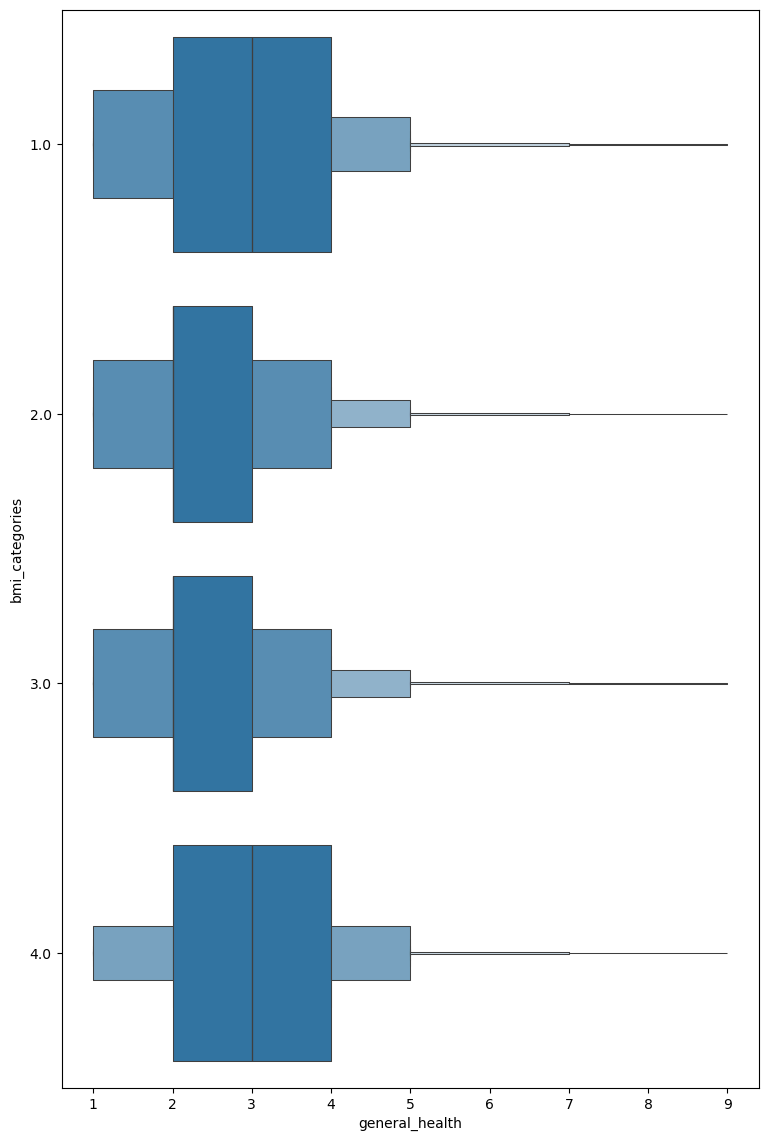

In [435]:
# Assuming perceived general health has some association with bmi categories

plt.figure(figsize=(9, 14))
sns.boxenplot(x='general_health', y="bmi_categories", data=cdc2023, orient='h')
plt.xlabel('general_health')
plt.ylabel("bmi_categories");

In [436]:
# Filling the bmi_categories variable with the mode based on the age group and perceived general health
cdc2023['bmi_categories'] = cdc2023.groupby(['age', 'general_health'])['bmi_categories'].transform(lambda value: value.fillna(value.mode().iloc[0]))

# Filling the bmi_categories variable with the mode based on the age group
cdc2023['bmi_categories'] = cdc2023.groupby(['age'])['bmi_categories'].transform(lambda value: value.fillna(value.mode().iloc[0]))


cdc2023.sample(6)

,interview_month,interview_year,final_dispcode,sex_var,general_health,phys_health,mental_health,prim_insurance,med_cost,checkup1,...,when_last_high_blood_sugar_test,prediabetes_or_borderline_diabetes,diabetes_type,insulin,times_Checked_glyco_hemoglobin,eye_exam_pupil_dilated,no_smoking_in_12months,feel_lonely,bmi_categories,age
270496,b'07',b'2023',1100.0,2.0,3.0,5.0,15.0,3.0,2.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,10.0
103703,b'08',b'2023',1100.0,1.0,4.0,15.0,88.0,7.0,2.0,1.0,...,1.0,NaN,2.0,2.0,4.0,2.0,NaN,4.0,3.0,12.0
214311,b'03',b'2023',1100.0,2.0,1.0,88.0,88.0,1.0,2.0,1.0,...,1.0,3.0,NaN,NaN,NaN,NaN,NaN,5.0,4.0,8.0
29363,b'02',b'2024',1100.0,2.0,4.0,21.0,15.0,3.0,2.0,1.0,...,1.0,NaN,2.0,2.0,2.0,2.0,NaN,3.0,4.0,13.0
16003,b'06',b'2023',1100.0,2.0,4.0,30.0,5.0,3.0,2.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,8.0
20730,b'01',b'2024',1100.0,2.0,3.0,4.0,88.0,77.0,1.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,5.0


In [437]:

# Define a dictionary mapping each column to its fill value
fill_values = {
    "bp_meds1": 7, # filled with category "don't know/not sure"
    "told_chol_high3": 7, # filled with category "don't know/not sure"
    "chol_med3": 7, # filled with category "don't know/not sure"
    "age_diabetes4": 98, # filled with category "don't know/not sure"
    "children": 88, # filled with category "None"
    "income3": 77, # filled with category "don't know/not sure"
    "pregnancy": 7,  # filled with category "don't know/not sure"
    "weight_pounds": 7777, # filled with category "don't know/not sure"
    "height_feet_inches": 7777, # filled with category "don't know/not sure"
    "avg_alco_per_day": 88, # 88 = None
    "prediabetes_or_borderline_diabetes": 3, # No prediabetes or borderline diabetes 
    "diabetes_type": 3, # No type of diabetes
    "insulin": 2, # No insulin usage
    "times_Checked_glyco_hemoglobin": 88, # filling in with the category none *
    "eye_exam_pupil_dilated": 8, # filling in with never had an eye exam *
    "no_smoking_in_12months": 3, # Never used or smoked
}

# Fill the missing values for these columns
cdc2023.fillna(value=fill_values, inplace=True)

# check the result by printing the first few rows
print(cdc2023.head(6))


  interview_month interview_year  final_dispcode  sex_var  general_health  \
0           b'03'        b'2023'          1100.0      2.0             2.0   
1           b'01'        b'2023'          1100.0      2.0             2.0   
2           b'03'        b'2023'          1100.0      2.0             4.0   
3           b'03'        b'2023'          1100.0      2.0             2.0   
4           b'01'        b'2023'          1100.0      2.0             4.0   
5           b'01'        b'2023'          1100.0      2.0             3.0   

   phys_health  mental_health  prim_insurance  med_cost  checkup1  ...  \
0         88.0           88.0             3.0       2.0       2.0  ...   
1         88.0           88.0             3.0       2.0       2.0  ...   
2          6.0            2.0             3.0       1.0       1.0  ...   
3          2.0           88.0             3.0       2.0       3.0  ...   
4         88.0           88.0             3.0       2.0       1.0  ...   
5          2.0  

In [438]:
# List the columns you want to check
columns_to_check = [
    "bp_meds1", 
    "told_chol_high3", 
    "chol_med3", 
    "age_diabetes4", 
    "children", 
    "income3", 
    "pregnancy", 
    "weight_pounds", 
    "height_feet_inches",''
    "difficulty_concentrating_or_remembering",
    "physical_act12",
    "deaf_or_diffi_hearing",
    "smoked_100cigarettes",
    "smokeday2",
    "smokeless_tobacco",
    "e-cigars_or_vaping",
    "alco_days",
    "when_last_high_blood_sugar_test",
    "prediabetes_or_borderline_diabetes",
    "diabetes_type",
    "insulin",
    "times_Checked_glyco_hemoglobin",
    "eye_exam_pupil_dilated",
    "no_smoking_in_12months",
    "feel_lonely",
    "bmi_categories"
]

# Calculate the number of null values for each column
null_counts = cdc2023[columns_to_check].isnull().sum()

# Print the results
print(null_counts)


bp_meds1                                   0
told_chol_high3                            0
chol_med3                                  0
age_diabetes4                              0
children                                   0
income3                                    0
pregnancy                                  0
weight_pounds                              0
height_feet_inches                         0
difficulty_concentrating_or_remembering    0
physical_act12                             0
deaf_or_diffi_hearing                      0
smoked_100cigarettes                       0
smokeday2                                  0
smokeless_tobacco                          0
e-cigars_or_vaping                         0
alco_days                                  0
when_last_high_blood_sugar_test            0
prediabetes_or_borderline_diabetes         0
diabetes_type                              0
insulin                                    0
times_Checked_glyco_hemoglobin             0
eye_exam_p

In [439]:
cdc2023.fillna(0, inplace=True)


In [440]:
cdc2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433318 entries, 0 to 433322
Data columns (total 52 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   interview_month                          433318 non-null  object 
 1   interview_year                           433318 non-null  object 
 2   final_dispcode                           433318 non-null  float64
 3   sex_var                                  433318 non-null  float64
 4   general_health                           433318 non-null  float64
 5   phys_health                              433318 non-null  float64
 6   mental_health                            433318 non-null  float64
 7   prim_insurance                           433318 non-null  float64
 8   med_cost                                 433318 non-null  float64
 9   checkup1                                 433318 non-null  float64
 10  exer_any2                            

In [441]:
unique_counts = cdc2023.nunique()
print(unique_counts)


interview_month                             12
interview_year                               2
final_dispcode                               2
sex_var                                      2
general_health                               8
phys_health                                 34
mental_health                               34
prim_insurance                              14
med_cost                                     5
checkup1                                     8
exer_any2                                    5
physical_act12                              13
bp_high                                      7
bp_meds1                                     4
chol_check3                                 10
told_chol_high3                              4
chol_med3                                    4
diagnosed_heart_attack4                      5
diagnosed_angina_or_cor_heart                5
diagosed_stroke3                             5
asthma3                                      5
copd_emphysem

Check unique values for some features

In [442]:
for col in cdc2023.columns:
    unique_vals = cdc2023[col].unique()
    if len(unique_vals) > 5:
        print(f"Column: {col} (Total unique values: {len(unique_vals)})")
        print(unique_vals)
        print("=" * 40)

Column: interview_month (Total unique values: 12)
["b'03'" "b'01'" "b'04'" "b'05'" "b'06'" "b'07'" "b'08'" "b'09'" "b'10'"
 "b'11'" "b'12'" "b'02'"]
Column: general_health (Total unique values: 8)
[2. 4. 3. 5. 1. 7. 9. 0.]
Column: phys_health (Total unique values: 34)
[88.  6.  2.  8.  1.  5.  4. 30. 15. 21. 10. 25. 14.  7. 20. 77.  3. 12.
 26.  9. 24. 18. 13. 99. 28. 23. 16. 17. 11. 29. 27. 22. 19.  0.]
Column: mental_health (Total unique values: 34)
[88.  2.  3. 77. 10. 25.  5. 30. 20. 15. 12.  4.  1.  6. 21. 14.  7. 99.
 29.  8. 18. 16. 17.  9. 28. 13. 22. 11. 24. 27. 23. 26. 19.  0.]
Column: prim_insurance (Total unique values: 14)
[ 3.  7.  1.  2. 88. 99. 10.  9.  4.  5. 77.  8.  6.  0.]
Column: checkup1 (Total unique values: 8)
[2. 1. 3. 8. 4. 7. 9. 0.]
Column: physical_act12 (Total unique values: 13)
[ 1.  8.  3.  4.  9.  5. 10.  2. 11. 99.  7.  6. 77.]
Column: bp_high (Total unique values: 7)
[1. 3. 2. 4. 7. 9. 0.]
Column: chol_check3 (Total unique values: 10)
[3. 2. 1. 4. 7. 8

#Recoding special values for the following features

In [443]:
# for the feature 'interview_month', strip the leading "b'" and trailing "'" :
cdc2023['interview_month'] = cdc2023['interview_month'].str.strip("b'")
print(cdc2023['interview_month'].unique())    #view all unique values

['03' '01' '04' '05' '06' '07' '08' '09' '10' '11' '12' '02']


In [444]:
# For 'phys_health', replace 88, 77, and 99 with 0
cdc2023['phys_health'] = cdc2023['phys_health'].replace({88: 0, 77: 0, 99: 0})
print(cdc2023['phys_health'].unique())

[ 0.  6.  2.  8.  1.  5.  4. 30. 15. 21. 10. 25. 14.  7. 20.  3. 12. 26.
  9. 24. 18. 13. 28. 23. 16. 17. 11. 29. 27. 22. 19.]


In [445]:
# For 'mental_health', replace 88, 77, and 99 with 0
cdc2023['mental_health'] = cdc2023['mental_health'].replace({88: 0, 77: 0, 99: 0})
print(cdc2023['mental_health'].unique())    #view all unique values

[ 0.  2.  3. 10. 25.  5. 30. 20. 15. 12.  4.  1.  6. 21. 14.  7. 29.  8.
 18. 16. 17.  9. 28. 13. 22. 11. 24. 27. 23. 26. 19.]


In [446]:
#For 'prim_insurance', replace 88, 77, and 99 with 0
cdc2023['prim_insurance_clean'] = cdc2023['prim_insurance'].replace({88: 0, 77: 0, 99: 0})
print(cdc2023['prim_insurance'].unique())


[ 3.  7.  1.  2. 88. 99. 10.  9.  4.  5. 77.  8.  6.  0.]


In [447]:
# For age_diabetes4, replace 98 and 99 with median
# Calculate the median for 'age_diabetes4' excluding the special codes 98 and 99
median_age = cdc2023.loc[~cdc2023['age_diabetes4'].isin([98, 99]), 'age_diabetes4'].median()

# Replace 98 and 99 with the calculated median value
cdc2023['age_diabetes4'] = cdc2023['age_diabetes4'].replace({98: median_age, 99: median_age})

# Check the result by printing unique values and summary statistics
print("Unique values for age_diabetes4:")
print(cdc2023['age_diabetes4'].unique())

print("\nSummary statistics for age_diabetes4:")
print(cdc2023['age_diabetes4'].describe())


Unique values for age_diabetes4:
[57. 50. 68. 60. 75. 45. 65. 67. 23. 54. 58. 46. 55.  4. 30. 69. 63. 73.
 35. 52. 47. 62. 61. 40. 49. 19. 70. 20. 31. 41. 38. 71. 42. 48. 56. 39.
 36. 10. 72. 85. 78. 33. 53. 74. 82. 44. 66. 51. 80. 64. 27. 79. 77. 43.
 37. 26. 21. 59. 28. 24. 29. 25. 18.  9. 32. 92. 15. 13. 34. 22.  7. 14.
 11. 17.  5. 84. 83.  6. 76. 16. 87.  2. 86. 12.  8.  3. 81.  1. 88. 93.
 90. 95. 89. 94. 97. 91.]

Summary statistics for age_diabetes4:
count    433318.000000
mean         49.962346
std           5.307081
min           1.000000
25%          50.000000
50%          50.000000
75%          50.000000
max          97.000000
Name: age_diabetes4, dtype: float64


In [448]:
# For children, replace 81, 88 and 89 with median
# Calculate the median for 'children' excluding the special codes 88 and 99
median_children = cdc2023.loc[~cdc2023['children'].isin([81, 88, 99]), 'children'].median()

# Replace 88 and 89 with the calculated median value
cdc2023['children'] = cdc2023['children'].replace({81: median_children, 88: median_children, 99: median_children})

# Check the result by printing unique values and summary statistics
print("Unique values for children:")
print(cdc2023['children'].unique())

print("\nSummary statistics for children:")
print(cdc2023['children'].describe())


Unique values for children:
[ 2.  1.  4.  3.  6.  5.  7.  9. 10.  8. 14. 12. 20. 23. 18. 17. 26. 11.
 43. 16. 30. 31. 22. 13. 15. 35. 41.]

Summary statistics for children:
count    433318.000000
mean          1.983105
std           0.562670
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          43.000000
Name: children, dtype: float64


In [449]:
def convert_weight(val):
    # First, check for special codes representing "don't know" or "refused"
    if val in [7777, 9999]:
        return np.nan
    # Then, check if the value is a metric entry (9000-10000) and convert from kg to pounds.
    elif 9000 <= val < 10000:
        return (val - 9000) * 2.20462
    else:
        # If the value is unreasonably high (e.g., >1000), assume it's off by a factor of 10
        if val > 1000:
            return val / 10.0
        else:
            return val

# Apply the conversion function to the 'weight_pounds' column.
cdc2023['weight_pounds_clean'] = cdc2023['weight_pounds'].apply(convert_weight)

# Calculate the median weight (ignoring the NaN values).
median_weight = cdc2023['weight_pounds_clean'].median()

# Replace NaN values (from special codes) with the median.
cdc2023['weight_pounds_clean'] = cdc2023['weight_pounds_clean'].fillna(median_weight)

# Check the result.
print("Unique values for weight_pounds_clean:")
print(cdc2023['weight_pounds_clean'].unique())

print("\nSummary statistics for weight_pounds_clean:")
print(cdc2023['weight_pounds_clean'].describe())


Unique values for weight_pounds_clean:
[172.      132.      130.      170.      165.      180.      135.
 195.      160.      300.      145.      142.      223.      188.
 187.      175.      210.      200.      120.      177.      114.
 202.      150.      275.      140.      270.      220.      153.
 186.      240.      194.      138.      174.      133.      360.
 146.      118.      343.      184.      290.      124.      119.
 197.      235.      246.      295.      154.      178.      166.
 123.      126.      230.      155.      103.      196.      171.
 149.      190.      163.      148.      198.      125.      168.
 222.      225.      206.      215.      185.      162.      116.
 340.      245.      127.      285.      167.      152.      158.
 107.      248.      182.      253.      205.      106.      238.
 250.      218.      191.      102.      208.      212.      121.
 280.      144.      128.      214.      207.      100.      164.
 181.      136.      277.      110.  

In [450]:
# For height_feet_inches

def convert_height(val):
    # Special codes: if the value is 7777 or 9999, mark as missing
    if val in [7777, 9999]:
        return np.nan
    # Metric values: if the value is 9000 or greater, treat as metric.
    elif val >= 9000:
        # Convert metric: subtract 9000 to get centimeters, then convert to feet.
        return (val - 9000) / 30.48
    else:
        # Non-metric: assume value is in the format ffii (feet and inches)
        feet = int(val // 100)
        inches = val % 100
        return feet + inches / 12.0

# Apply the conversion function
cdc2023['height_feet_inches_clean'] = cdc2023['height_feet_inches'].apply(convert_height)

# Now, filter out unreasonable heights (less than 3 feet or more than 7.5 feet)
cdc2023.loc[(cdc2023['height_feet_inches_clean'] < 3) | (cdc2023['height_feet_inches_clean'] > 7.5), 'height_feet_inches_clean'] = np.nan

# Calculate the median from the remaining (reasonable) values
median_height = cdc2023['height_feet_inches_clean'].median()

# Replace NaN values (from special codes or unreasonable heights) with the median
cdc2023['height_feet_inches_clean'] = cdc2023['height_feet_inches_clean'].fillna(median_height)

# Check the result: print unique values and summary statistics
print("Unique values for height_feet_inches_clean:")
print(cdc2023['height_feet_inches_clean'].unique())

print("\nSummary statistics for height_feet_inches_clean:")
print(cdc2023['height_feet_inches_clean'].describe())


Unique values for height_feet_inches_clean:
[5.25       4.75       5.33333333 5.5        5.66666667 5.16666667
 6.         4.91666667 5.83333333 5.91666667 5.41666667 6.08333333
 5.58333333 6.25       5.         5.08333333 5.75       6.16666667
 4.83333333 4.66666667 4.33333333 4.58333333 6.33333333 6.5
 6.41666667 6.58333333 6.66666667 4.16666667 6.83333333 4.59317585
 7.16666667 5.41338583 6.72572178 6.91666667 3.         5.77427822
 5.74146982 5.97112861 5.24934383 5.18372703 5.08530184 5.47900262
 5.70866142 6.75       4.41666667 5.57742782 4.5        3.44488189
 5.01968504 5.38057743 5.90551181 5.67585302 4.92125984 4.79002625
 5.51181102 5.05249344 5.31496063 5.11811024 5.93832021 6.00393701
 4.98687664 5.44619423 4.         5.34776903 4.25       7.
 5.64304462 6.1023622  5.83989501 4.08333333 3.37926509 6.06955381
 4.95406824 3.08333333 5.28215223 5.15091864 4.75721785 5.54461942
 6.2335958  4.85564304 5.21653543 3.54330709 4.26509186 4.10104987
 3.41666667 5.80708661 7.25      

In [451]:
#For alco_days, change to the same unit days per week

# Define a conversion function for alco_days
def convert_alco_days(val):
    # For special codes:
    if val == 888:
        return 0  # No drinks → 0 days per week
    elif val in [777, 999]:
        return np.nan
    # For values in the range 101-199: these already represent days per week,
    # so subtract 100 to get the actual number of days.
    elif 101 <= val <= 199:
        return val - 100
    # For values in the range 201-299: these represent days in the past 30 days.
    # Convert them to days per week by: (days_in_past_30) * (7/30)
    elif 201 <= val <= 299:
        return (val - 200) * (7 / 30)
    else:
        return np.nan

# Apply the conversion function to the 'alco_days' column.
cdc2023['alco_days_clean'] = cdc2023['alco_days'].apply(convert_alco_days)

# Calculate the median for alco_days_clean (ignoring missing values)
median_alco_days = cdc2023['alco_days_clean'].median()

# Replace missing values (from codes 777 and 999) with the median
cdc2023['alco_days_clean'] = cdc2023['alco_days_clean'].fillna(median_alco_days)

# Check the results: print unique values and summary statistics.
print("Unique values for alco_days_clean:")
print(cdc2023['alco_days_clean'].unique())

print("\nSummary statistics for alco_days_clean:")
print(cdc2023['alco_days_clean'].describe())


Unique values for alco_days_clean:
[0.         0.46666667 1.16666667 2.         7.         2.33333333
 0.7        0.23333333 0.93333333 1.         1.4        6.
 3.5        3.         3.26666667 4.         4.66666667 6.76666667
 4.9        5.83333333 5.         6.53333333 2.8        1.63333333
 1.86666667 5.6        3.73333333 4.43333333 6.3        4.2
 2.1        6.06666667 3.96666667 5.36666667 2.56666667 5.13333333
 3.03333333]

Summary statistics for alco_days_clean:
count    433318.000000
mean          1.070557
std           1.855049
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           7.000000
Name: alco_days_clean, dtype: float64


In [452]:
#For avg_alco_per_day
# Replace special codes: 88 → 0, 77 and 99 → np.nan
cdc2023['avg_alco_per_day'] = cdc2023['avg_alco_per_day'].replace({88: 0, 77: np.nan, 99: np.nan})

# Calculate the median (ignoring NaN values)
median_avg_alco = cdc2023['avg_alco_per_day'].median()

# Replace the NaN values with the calculated median
cdc2023['avg_alco_per_day'] = cdc2023['avg_alco_per_day'].fillna(median_avg_alco)

# Check the results: print unique values and summary statistics
print("Unique values for avg_alco_per_day:")
print(cdc2023['avg_alco_per_day'].unique())

print("\nSummary statistics for avg_alco_per_day:")
print(cdc2023['avg_alco_per_day'].describe())

Unique values for avg_alco_per_day:
[ 0.  1.  2.  4.  5.  6.  3. 12. 10.  7. 20. 14.  9. 15.  8. 16. 40. 13.
 18. 11. 60. 76. 30. 24. 27. 36. 70. 69. 25. 22. 50. 17. 23. 62. 75. 32.
 52. 48. 45. 21. 59. 46. 35. 28. 42. 63. 73. 19. 29. 64.]

Summary statistics for avg_alco_per_day:
count    433318.000000
mean          1.050099
std           1.864422
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          76.000000
Name: avg_alco_per_day, dtype: float64


In [453]:
#For 'times_Checked_glyco_hemoglobin'
# Replace special codes: set 88 and 98 to 0, and mark 77 and 99 as missing
cdc2023['times_Checked_glyco_hemoglobin'] = cdc2023['times_Checked_glyco_hemoglobin'].replace({88: 0, 98: 0, 77: np.nan, 99: np.nan})

# Calculate the median of valid values (ignoring NaN)
median_value = cdc2023['times_Checked_glyco_hemoglobin'].median()

# Replace NaN values (from codes 77 and 99) with the median
cdc2023['times_Checked_glyco_hemoglobin'] = cdc2023['times_Checked_glyco_hemoglobin'].fillna(median_value)

# Check the result: print unique values and summary statistics
print("Unique values for times_Checked_glyco_hemoglobin:")
print(cdc2023['times_Checked_glyco_hemoglobin'].unique())

print("\nSummary statistics for times_Checked_glyco_hemoglobin:")
print(cdc2023['times_Checked_glyco_hemoglobin'].describe())

Unique values for times_Checked_glyco_hemoglobin:
[ 0.  3.  1.  4.  2.  5.  6. 12. 11. 24. 30. 10. 76.  8. 26.  7.  9. 48.
 45. 20. 46. 15. 36. 13. 50. 40. 25. 17. 60. 23. 14. 16. 52. 70. 18. 73.
 28. 22. 44. 75. 69.]

Summary statistics for times_Checked_glyco_hemoglobin:
count    433318.000000
mean          0.154893
std           1.328658
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          76.000000
Name: times_Checked_glyco_hemoglobin, dtype: float64


In [454]:
#Creat a new variable as target, 
# Create a new variable based on diabetes4
cdc2023['new_diabetes4'] = cdc2023['diabetes4'].copy()

# For rows where prediabetes_or_borderline_diabetes is 1, update the new variable to 4
cdc2023.loc[cdc2023['prediabetes_or_borderline_diabetes'] == 1, 'new_diabetes4'] = 4

# Check the value counts to ensure there are 23945 instances of 4
print(cdc2023['new_diabetes4'].value_counts())


new_diabetes4
3.0    340019
1.0     59786
4.0     29643
2.0      2991
7.0       589
9.0       285
0.0         5
Name: count, dtype: int64


In [455]:
cdc2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433318 entries, 0 to 433322
Data columns (total 57 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   interview_month                          433318 non-null  object 
 1   interview_year                           433318 non-null  object 
 2   final_dispcode                           433318 non-null  float64
 3   sex_var                                  433318 non-null  float64
 4   general_health                           433318 non-null  float64
 5   phys_health                              433318 non-null  float64
 6   mental_health                            433318 non-null  float64
 7   prim_insurance                           433318 non-null  float64
 8   med_cost                                 433318 non-null  float64
 9   checkup1                                 433318 non-null  float64
 10  exer_any2                            

In [456]:
#Drop columns
# List of columns to drop
columns_to_drop = [
    'interview_month', 'interview_year', 'prim_insurance',
    'weight_pounds', 'height_feet_inches', 'alco_days',
    'diabetes4', 'prediabetes_or_borderline_diabetes'
]

# Drop the columns and update the DataFrame
cdc2023 = cdc2023.drop(columns=columns_to_drop)

# Display the first few rows to check the results
print(cdc2023.head())

   final_dispcode  sex_var  general_health  phys_health  mental_health  \
0          1100.0      2.0             2.0          0.0            0.0   
1          1100.0      2.0             2.0          0.0            0.0   
2          1100.0      2.0             4.0          6.0            2.0   
3          1100.0      2.0             2.0          2.0            0.0   
4          1100.0      2.0             4.0          0.0            0.0   

   med_cost  checkup1  exer_any2  physical_act12  bp_high  ...  \
0       2.0       2.0        2.0             1.0      1.0  ...   
1       2.0       2.0        1.0             1.0      1.0  ...   
2       1.0       1.0        1.0             1.0      1.0  ...   
3       2.0       3.0        1.0             1.0      3.0  ...   
4       2.0       1.0        1.0             1.0      1.0  ...   

   eye_exam_pupil_dilated  no_smoking_in_12months  feel_lonely  \
0                     8.0                     3.0          5.0   
1                     8.0 

In [457]:
#change data type for the following features
# List of columns to convert from float to categorical
cols_to_convert = [
    'final_dispcode', 'sex_var', 'general_health', 'med_cost', 'checkup1',
    'exer_any2', 'physical_act12', 'bp_high', 'bp_meds1', 'chol_check3',
    'told_chol_high3', 'chol_med3', 'diagnosed_heart_attack4',
    'diagnosed_angina_or_cor_heart', 'diagosed_stroke3', 'asthma3',
    'copd_emphysema_or_chronic_bronchitis', 'skin_cancer_not_melanoma',
    'told_kidney_disease', 'told_arthritis', 'marital', 'education',
    'income3', 'pregnancy', 'difficulty_concentrating_or_remembering',
    'deaf_or_diffi_hearing', 'smoked_100cigarettes', 'smokeday2',
    'smokeless_tobacco', 'e-cigars_or_vaping', 'when_last_high_blood_sugar_test',
    'diabetes_type', 'insulin', 'eye_exam_pupil_dilated', 'no_smoking_in_12months',
    'feel_lonely', 'bmi_categories', 'age', 'prim_insurance_clean', 'new_diabetes4'
]

# Convert each column to a categorical type
for col in cols_to_convert:
    cdc2023[col] = cdc2023[col].astype('category')

# Verify the changes by checking the DataFrame info
print(cdc2023.info())

<class 'pandas.core.frame.DataFrame'>
Index: 433318 entries, 0 to 433322
Data columns (total 49 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   final_dispcode                           433318 non-null  category
 1   sex_var                                  433318 non-null  category
 2   general_health                           433318 non-null  category
 3   phys_health                              433318 non-null  float64 
 4   mental_health                            433318 non-null  float64 
 5   med_cost                                 433318 non-null  category
 6   checkup1                                 433318 non-null  category
 7   exer_any2                                433318 non-null  category
 8   physical_act12                           433318 non-null  category
 9   bp_high                                  433318 non-null  category
 10  bp_meds1                 

In [458]:
cdc2023.columns

Index(['final_dispcode', 'sex_var', 'general_health', 'phys_health',
       'mental_health', 'med_cost', 'checkup1', 'exer_any2', 'physical_act12',
       'bp_high', 'bp_meds1', 'chol_check3', 'told_chol_high3', 'chol_med3',
       'diagnosed_heart_attack4', 'diagnosed_angina_or_cor_heart',
       'diagosed_stroke3', 'asthma3', 'copd_emphysema_or_chronic_bronchitis',
       'skin_cancer_not_melanoma', 'told_kidney_disease', 'told_arthritis',
       'age_diabetes4', 'marital', 'education', 'children', 'income3',
       'pregnancy', 'difficulty_concentrating_or_remembering',
       'deaf_or_diffi_hearing', 'smoked_100cigarettes', 'smokeday2',
       'smokeless_tobacco', 'e-cigars_or_vaping', 'avg_alco_per_day',
       'when_last_high_blood_sugar_test', 'diabetes_type', 'insulin',
       'times_Checked_glyco_hemoglobin', 'eye_exam_pupil_dilated',
       'no_smoking_in_12months', 'feel_lonely', 'bmi_categories', 'age',
       'prim_insurance_clean', 'weight_pounds_clean',
       'height_fe

In [459]:
# Split the dataset into 80% training and 20% testing sets
train, test = train_test_split(cdc2023, test_size=0.20, random_state=42)

# Check the shapes of the splits
print("Training set shape:", train.shape)
print("Test set shape:", test.shape)

Training set shape: (346654, 49)
Test set shape: (86664, 49)


In [460]:

# Separate features and target variable
X_train = train.drop(columns=['new_diabetes4'])
y_train = train['new_diabetes4']

X_test = test.drop(columns=['new_diabetes4'])
y_test = test['new_diabetes4']

# Identify categorical columns (these are already of type 'category')
cat_cols = X_train.select_dtypes(include=['category']).columns.tolist()

# Identify numerical columns as those not in categorical list
num_cols = [col for col in X_train.columns if col not in cat_cols]

# Print lists of categorical and numerical columns
print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)



Categorical columns: ['final_dispcode', 'sex_var', 'general_health', 'med_cost', 'checkup1', 'exer_any2', 'physical_act12', 'bp_high', 'bp_meds1', 'chol_check3', 'told_chol_high3', 'chol_med3', 'diagnosed_heart_attack4', 'diagnosed_angina_or_cor_heart', 'diagosed_stroke3', 'asthma3', 'copd_emphysema_or_chronic_bronchitis', 'skin_cancer_not_melanoma', 'told_kidney_disease', 'told_arthritis', 'marital', 'education', 'income3', 'pregnancy', 'difficulty_concentrating_or_remembering', 'deaf_or_diffi_hearing', 'smoked_100cigarettes', 'smokeday2', 'smokeless_tobacco', 'e-cigars_or_vaping', 'when_last_high_blood_sugar_test', 'diabetes_type', 'insulin', 'eye_exam_pupil_dilated', 'no_smoking_in_12months', 'feel_lonely', 'bmi_categories', 'age', 'prim_insurance_clean']
Numerical columns: ['phys_health', 'mental_health', 'age_diabetes4', 'children', 'avg_alco_per_day', 'times_Checked_glyco_hemoglobin', 'weight_pounds_clean', 'height_feet_inches_clean', 'alco_days_clean']


In [461]:
# creating a separate dataset to be used for the comorbidities assessment
comorbidities_cdc2023 = cdc2023.copy()


comorbidities_cdc2023.sample(5)

,final_dispcode,sex_var,general_health,phys_health,mental_health,med_cost,checkup1,exer_any2,physical_act12,bp_high,...,eye_exam_pupil_dilated,no_smoking_in_12months,feel_lonely,bmi_categories,age,prim_insurance_clean,weight_pounds_clean,height_feet_inches_clean,alco_days_clean,new_diabetes4
214559,1100.0,2.0,4.0,0.0,0.0,2.0,1.0,1.0,1.0,3.0,...,8.0,2.0,5.0,4.0,8.0,1.0,255.0,5.500000,0.000000,3.0
145249,1100.0,1.0,4.0,30.0,0.0,2.0,1.0,2.0,1.0,1.0,...,3.0,3.0,5.0,4.0,10.0,3.0,340.0,5.583333,0.000000,1.0
228582,1100.0,1.0,3.0,0.0,0.0,2.0,1.0,1.0,1.0,4.0,...,8.0,3.0,5.0,4.0,11.0,3.0,217.0,5.750000,3.500000,3.0
132547,1100.0,1.0,3.0,0.0,7.0,2.0,3.0,1.0,9.0,3.0,...,8.0,3.0,4.0,4.0,1.0,2.0,230.0,6.000000,1.166667,3.0
300074,1100.0,2.0,4.0,0.0,0.0,2.0,7.0,2.0,1.0,3.0,...,8.0,3.0,5.0,4.0,12.0,3.0,177.0,5.583333,0.000000,1.0


In [462]:
# One-hot encode the categorical features on training and test sets
# (We leave out the target variable new_diabetes4 from this process)
X_train_encoded = pd.get_dummies(X_train, columns=cat_cols, drop_first=False, dtype=int)
X_test_encoded = pd.get_dummies(X_test, columns=cat_cols, drop_first=False, dtype=int)

# Align test set columns with training set columns (fill missing dummy columns with zeros)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

print(X_train_encoded.head())
print(X_test_encoded.head())

        phys_health  mental_health  age_diabetes4  children  avg_alco_per_day  \
162524          0.0            0.0           50.0       2.0               5.0   
20052           3.0            1.0           50.0       2.0               1.0   
378524          0.0            0.0           50.0       2.0               1.0   
366694          2.0            0.0           50.0       2.0               1.0   
72493           0.0            0.0           13.0       2.0               0.0   

        times_Checked_glyco_hemoglobin  weight_pounds_clean  \
162524                             0.0                155.0   
20052                              0.0                200.0   
378524                             0.0                165.0   
366694                             0.0                180.0   
72493                              0.0                154.0   

        height_feet_inches_clean  alco_days_clean  final_dispcode_1100.0  ...  \
162524                  5.500000         7.000000    

In [463]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Make copies of the encoded data if you want to preserve the originals
X_train_scaled = X_train_encoded.copy()
X_test_scaled = X_test_encoded.copy()

# Fit the scaler on the numerical columns of the training set and transform them
X_train_scaled[num_cols] = scaler.fit_transform(X_train_encoded[num_cols])

# Transform the numerical columns of the test set using the same scaler
X_test_scaled[num_cols] = scaler.transform(X_test_encoded[num_cols])

# Check the results
print("Scaled Training Data:")
print(X_train_scaled.head())

print("\nScaled Test Data:")
print(X_test_scaled.head())


Scaled Training Data:
        phys_health  mental_health  age_diabetes4  children  avg_alco_per_day  \
162524    -0.499952      -0.518155       0.007457  0.030179          2.122605   
20052     -0.156804      -0.397297       0.007457  0.030179         -0.027861   
378524    -0.499952      -0.518155       0.007457  0.030179         -0.027861   
366694    -0.271187      -0.518155       0.007457  0.030179         -0.027861   
72493     -0.499952      -0.518155      -6.979756  0.030179         -0.565478   

        times_Checked_glyco_hemoglobin  weight_pounds_clean  \
162524                        -0.11638            -0.603842   
20052                         -0.11638             0.390616   
378524                        -0.11638            -0.382851   
366694                        -0.11638            -0.051365   
72493                         -0.11638            -0.625941   

        height_feet_inches_clean  alco_days_clean  final_dispcode_1100.0  ...  \
162524                 -0.25008

In [464]:
# Print number of instances and features for the training set
print("Training Set:")
print("Number of instances (rows):", X_train_scaled.shape[0])
print("Number of features (columns):", X_train_scaled.shape[1])

# Print number of instances and features for the test set
print("\nTest Set:")
print("Number of instances (rows):", X_test_scaled.shape[0])
print("Number of features (columns):", X_test_scaled.shape[1])

Training Set:
Number of instances (rows): 346654
Number of features (columns): 248

Test Set:
Number of instances (rows): 86664
Number of features (columns): 248


## Model Training

In [465]:
# Recode the target variable:
# Map 1 and 2 to 1 (diabetes), 3, 7 and 9 to 2 (no diabetes/prediabetes) and 4 to 0 (prediabetes)
y_train_bin = y_train.apply(lambda x: 1 if x in [1, 2] else (2 if x in [3, 7, 9] else 0))
y_test_bin = y_test.apply(lambda x: 1 if x in [1, 2] else (2 if x in [3, 7, 9] else 0))

# Check the resulting distribution
print("Training set class distribution:")
print(y_train_bin.value_counts())
print("\nTest set class distribution:")
print(y_test_bin.value_counts())


Training set class distribution:
new_diabetes4
2    272701
1     50197
0     23756
Name: count, dtype: int64

Test set class distribution:
new_diabetes4
2    68192
1    12580
0     5892
Name: count, dtype: int64


Without accounting for class imbalances

In [466]:
# Define evaluation metrics (using macro averaging to account for imbalanced classes)
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

# Use Stratified K-Fold cross-validation to preserve class imbalance in the binary target
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# model = LogisticRegression(max_iter=1000, class_weight='balanced', multi_class='multinomial', solver='lbfgs', n_jobs=-1)
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', n_jobs=-1)


cv_results = cross_validate(model, X_train_scaled, y_train_bin, cv=skf, scoring=scoring, n_jobs=-1)


print(f"Logistic Regression - Accuracy: {np.mean(cv_results['test_accuracy']):.4f}, "
        f"Precision: {np.mean(cv_results['test_precision']):.4f}, "
        f"Recall: {np.mean(cv_results['test_recall']):.4f}, "
        f"F1: {np.mean(cv_results['test_f1']):.4f}")
print("---------------------------------------------------")


# Train the model on the full training set
model.fit(X_train_scaled, y_train_bin)

y_test_pred_lr = model.predict(X_test_scaled)



print("Accuracy:", accuracy_score(y_test_bin, y_test_pred_lr))
print("Classification Report:")
print(classification_report(y_test_bin, y_test_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test_bin, y_test_pred_lr))

Logistic Regression - Accuracy: 0.8461, Precision: 0.6880, Recall: 0.4859, F1: 0.5066
---------------------------------------------------


c:\Users\ekf98\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8461875750023078
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.00      0.00      5892
           1       0.86      0.46      0.60     12580
           2       0.84      0.99      0.91     68192

    accuracy                           0.85     86664
   macro avg       0.71      0.49      0.51     86664
weighted avg       0.82      0.85      0.81     86664

Confusion Matrix:
[[   11   227  5654]
 [    2  5849  6729]
 [   14   704 67474]]


Accounting for class imbalances for logistic regression using optimal thresholds

c:\Users\ekf98\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ekf98\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ekf98\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


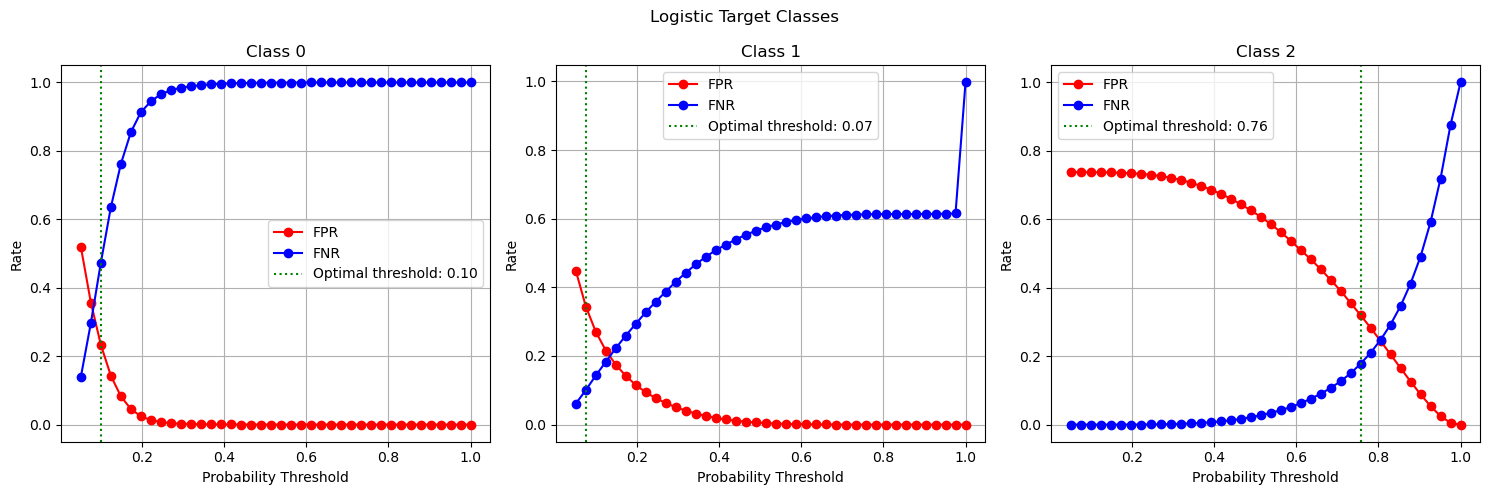

In [467]:
num_classes = 3
thresholds = np.linspace(0.05, 1, 40)
num_thresholds = len(thresholds)

# Dictionaries to collect validation metrics for each class, for each fold.
valid_fnrs_folds = {i: [] for i in range(num_classes)}
valid_fnps_folds = {i: [] for i in range(num_classes)}

# Iterate over Stratified K-Fold cross-validation
for train_idx, valid_idx in skf.split(X_train_scaled, y_train_bin):
    X_train_fold = X_train_scaled.iloc[train_idx]
    X_valid_fold = X_train_scaled.iloc[valid_idx]
    y_train_fold = y_train_bin.iloc[train_idx]
    y_valid_fold = y_train_bin.iloc[valid_idx]
    
    # Fit the model on the training fold
    model.fit(X_train_fold, y_train_fold)
    
    # Get predicted probabilities for the validation fold once per fold
    valid_probs = model.predict_proba(X_valid_fold)  # shape: (n_samples, num_classes)
    
    # Temporary dictionaries to store metrics for each class in this fold.
    valid_fnrs_temp = {i: [] for i in range(num_classes)}
    valid_fnps_temp = {i: [] for i in range(num_classes)}
    
    # Loop over thresholds
    for threshold in thresholds:
        for i in range(num_classes):
            # Create a one-vs-all binary label: 1 if sample belongs to class i, else 0.
            y_valid_true_i = (y_valid_fold == i).astype(int)
            # For the prediction, threshold the probability for class i.
            y_valid_pred_i = (valid_probs[:, i] >= threshold).astype(int)
            
            # Compute confusion matrix for binary classification.
            cm = confusion_matrix(y_valid_true_i, y_valid_pred_i, labels=[0, 1])
            tn, fp, fn, tp = cm.ravel()
            
            # Calculate FNR and FPR safely (handle division by zero)
            FNR = fn / (fn + tp) if (fn + tp) > 0 else 0
            FPR = fp / (fp + tn) if (fp + tn) > 0 else 0
            
            valid_fnrs_temp[i].append(FNR)
            valid_fnps_temp[i].append(FPR)
    
    # Append results from this fold for each class
    for i in range(num_classes):
        valid_fnrs_folds[i].append(valid_fnrs_temp[i])
        valid_fnps_folds[i].append(valid_fnps_temp[i])

# Now average the metrics across folds for each threshold, for each class.
valid_fnrs_by_class = {}
valid_fnps_by_class = {}

for i in range(num_classes):
    valid_fnrs_by_class[i] = np.mean(np.array(valid_fnrs_folds[i]), axis=0)
    valid_fnps_by_class[i] = np.mean(np.array(valid_fnps_folds[i]), axis=0)

# Define an acceptable max FPR threshold
MAX_FPR_THRESHOLD = 0.35  # Adjust this to your tolerance level for false positives

optimal_thresholds = []

plt.figure(figsize=(15, 5))

for i in range(num_classes):
    plt.subplot(1, num_classes, i+1)
    
    # Plot FPR and FNR vs thresholds for each class
    plt.plot(thresholds, valid_fnps_by_class[i], marker='o', color='red', label='FPR')
    plt.plot(thresholds, valid_fnrs_by_class[i], marker='o', color='blue', label='FNR')
    
    # Determine the optimal threshold (prioritizing low FNR while controlling FPR)
    fnrs = np.array(valid_fnrs_by_class[i])
    fprs = np.array(valid_fnps_by_class[i])

    # Find indices where FPR is within the acceptable range
    valid_indices = np.where(fprs <= MAX_FPR_THRESHOLD)[0]

    if len(valid_indices) > 0:
        # Select the threshold with the lowest FNR within the valid FPR range
        idx_min_fn = valid_indices[np.argmin(fnrs[valid_indices])]
    else:
        # If no threshold meets the FPR constraint, just minimize FNR
        idx_min_fn = np.argmin(fnrs)
    
    opt_threshold = thresholds[idx_min_fn]
    optimal_thresholds.append(opt_threshold)
    
    # Mark the optimal threshold with a vertical line
    plt.axvline(opt_threshold, color='green', linestyle=':', 
                label=f'Optimal threshold: {opt_threshold:.2f}')
    
    plt.xlabel('Probability Threshold')
    plt.ylabel('Rate')
    plt.title(f'Class {i}')
    plt.legend()
    plt.grid(True)

plt.suptitle("Logistic Target Classes")
plt.tight_layout()
plt.show()

In [468]:
def predict_with_thresholds(probs, thresholds):
    """
    Custom prediction function that uses one-vs-all thresholds.
    
    Parameters:
      probs: np.array of shape (n_samples, num_classes) with predicted probabilities.
      thresholds: dict mapping class index to threshold value.
      
    Returns:
      predictions: np.array of predicted class labels.
    """
    predictions = []
    for sample in probs:
        # List of candidate classes for which the probability exceeds the threshold.
        candidate_classes = [i for i in range(len(sample)) if sample[i] >= thresholds[i]]
        if len(candidate_classes) == 1:
            pred = candidate_classes[0]
        elif len(candidate_classes) > 1:
            # If more than one class exceeds its threshold, choose the one with the highest probability.
            pred = max(candidate_classes, key=lambda i: sample[i])
        else:
            # If no class exceeds its threshold, fall back to the class with highest probability.
            pred = np.argmax(sample)
        predictions.append(pred)
    return np.array(predictions)

In [469]:
# Split the training dataset into 80% training and 20% validation sets
x_train_sub, x_val, y_train_sub, y_val = train_test_split(X_train_scaled, y_train_bin, test_size=0.2, random_state=42, stratify=y_train_bin)

# Check the shapes of the new datasets
print("X_train_sub shape:", x_train_sub.shape)
print("X_val shape:", x_val.shape)
print("y_train_sub shape:", y_train_sub.shape)
print("y_val shape:", y_val.shape)




###################################################################################################################3
# Train your final model on the training sub set
model.fit(x_train_sub, y_train_sub)

# Predict probabilities on the test set
val_probs = model.predict_proba(x_val)


# Get predictions using the custom thresholding rule
y_pred = predict_with_thresholds(val_probs, optimal_thresholds)

# Compute metrics
acc = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')


print("LOGISTIC REGRESSION RESULTS")
print("Validation results")
print("Accuracy:", acc)
print("Classification Report:\n", report)
print("Weighted F1 Score:", f1)



##########################################################################################
# Train your final model on the entire training set
model.fit(X_train_scaled, y_train_bin)

# Predict probabilities on the test set
test_probs = model.predict_proba(X_test_scaled)


# Get predictions using the custom thresholding rule
y_pred = predict_with_thresholds(test_probs, optimal_thresholds)

# Compute metrics
acc = accuracy_score(y_test_bin, y_pred)
report = classification_report(y_test_bin, y_pred)
f1 = f1_score(y_test_bin, y_pred, average='weighted')


print("Test results")
print("Accuracy:", acc)
print("Classification Report:\n", report)
print("Weighted F1 Score:", f1)

X_train_sub shape: (277323, 248)
X_val shape: (69331, 248)
y_train_sub shape: (277323,)
y_val shape: (69331,)


c:\Users\ekf98\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LOGISTIC REGRESSION RESULTS
Validation results
Accuracy: 0.7630208708946936
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.11      0.14      4751
           1       0.44      0.76      0.56     10040
           2       0.91      0.82      0.86     54540

    accuracy                           0.76     69331
   macro avg       0.51      0.56      0.52     69331
weighted avg       0.79      0.76      0.77     69331

Weighted F1 Score: 0.7675669585990967


c:\Users\ekf98\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Test results
Accuracy: 0.7640427397766085
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.10      0.14      5892
           1       0.44      0.76      0.56     12580
           2       0.90      0.82      0.86     68192

    accuracy                           0.76     86664
   macro avg       0.51      0.56      0.52     86664
weighted avg       0.79      0.76      0.77     86664

Weighted F1 Score: 0.7680928170199046


Without accounting for class imbabalances

In [470]:
model_xg_boost = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', objective='multi:softmax', num_class=3)

cv_xgboost_results = cross_validate(model_xg_boost, X_train_scaled, y_train_bin, cv=skf, scoring=scoring, n_jobs=-1)



print(f"xgboost cross-validated results: - Accuracy: {np.mean(cv_xgboost_results['test_accuracy']):.4f}, "
        f"Precision: {np.mean(cv_xgboost_results['test_precision']):.4f}, "
        f"Recall: {np.mean(cv_xgboost_results['test_recall']):.4f}, "
        f"F1: {np.mean(cv_xgboost_results['test_f1']):.4f}")
print("---------------------------------------------------")


# Train the model on the full training set
model_xg_boost.fit(X_train_scaled, y_train_bin)

y_test_pred_xgboost = model_xg_boost.predict(X_test_scaled)


print("Accuracy:", accuracy_score(y_test_bin, y_test_pred_xgboost))
print("Classification Report:")
print(classification_report(y_test_bin, y_test_pred_xgboost))
print("Confusion Matrix:")
print(confusion_matrix(y_test_bin, y_test_pred_xgboost))

xgboost cross-validated results: - Accuracy: 0.9106, Precision: 0.7329, Recall: 0.6202, F1: 0.6251
---------------------------------------------------


c:\Users\ekf98\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:39:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9110934182590233
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.00      0.01      5892
           1       1.00      0.86      0.92     12580
           2       0.90      1.00      0.95     68192

    accuracy                           0.91     86664
   macro avg       0.76      0.62      0.63     86664
weighted avg       0.88      0.91      0.88     86664

Confusion Matrix:
[[   22     1  5869]
 [    6 10777  1797]
 [   30     2 68160]]


Accounting for class imbalances for logistic regression using optimal thresholds

c:\Users\ekf98\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:40:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ekf98\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:40:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ekf98\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:40:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


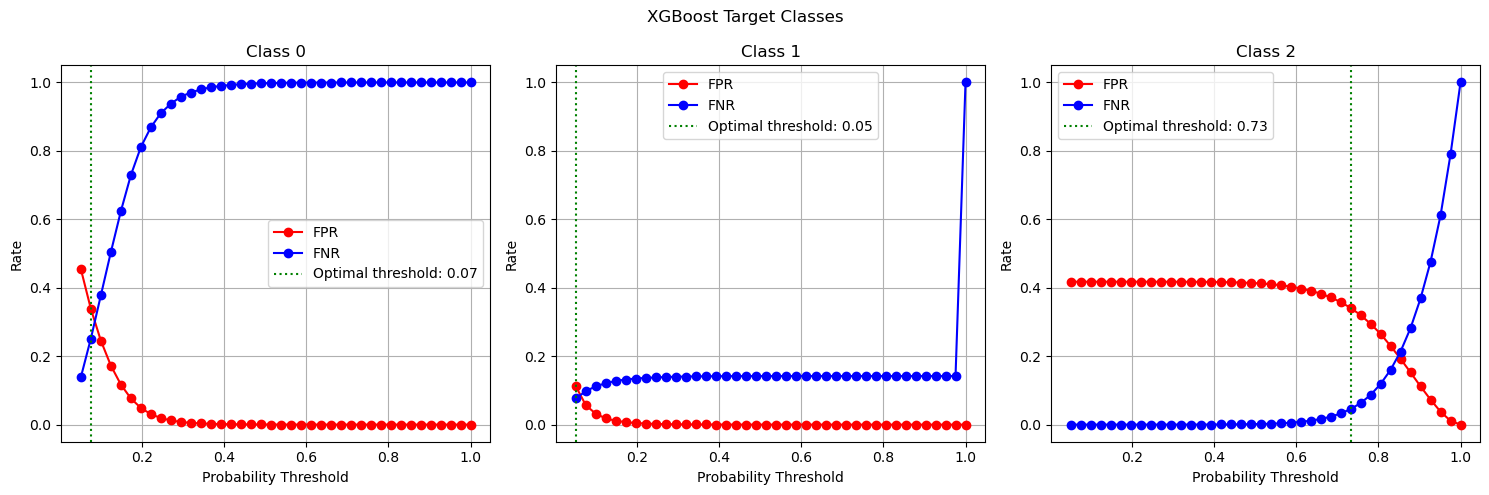

In [471]:
# Dictionaries to collect validation metrics for each class, for each fold.
valid_fnrs_folds = {i: [] for i in range(num_classes)}
valid_fnps_folds = {i: [] for i in range(num_classes)}

# Iterate over Stratified K-Fold cross-validation
for train_idx, valid_idx in skf.split(X_train_scaled, y_train_bin):
    X_train_fold = X_train_scaled.iloc[train_idx]
    X_valid_fold = X_train_scaled.iloc[valid_idx]
    y_train_fold = y_train_bin.iloc[train_idx]
    y_valid_fold = y_train_bin.iloc[valid_idx]
    
    # Fit the model on the training fold
    model_xg_boost.fit(X_train_fold, y_train_fold)
    
    # Get predicted probabilities for the validation fold once per fold
    valid_probs = model_xg_boost.predict_proba(X_valid_fold)  # shape: (n_samples, num_classes)
    
    # Temporary dictionaries to store metrics for each class in this fold.
    valid_fnrs_temp = {i: [] for i in range(num_classes)}
    valid_fnps_temp = {i: [] for i in range(num_classes)}
    
    # Loop over thresholds
    for threshold in thresholds:
        for i in range(num_classes):
            # Create a one-vs-all binary label: 1 if sample belongs to class i, else 0.
            y_valid_true_i = (y_valid_fold == i).astype(int)
            # For the prediction, threshold the probability for class i.
            y_valid_pred_i = (valid_probs[:, i] >= threshold).astype(int)
            
            # Compute confusion matrix for binary classification.
            cm = confusion_matrix(y_valid_true_i, y_valid_pred_i, labels=[0, 1])
            tn, fp, fn, tp = cm.ravel()
            
            # Calculate FNR and FPR safely (handle division by zero)
            FNR = fn / (fn + tp) if (fn + tp) > 0 else 0
            FPR = fp / (fp + tn) if (fp + tn) > 0 else 0
            
            valid_fnrs_temp[i].append(FNR)
            valid_fnps_temp[i].append(FPR)
    
    # Append results from this fold for each class
    for i in range(num_classes):
        valid_fnrs_folds[i].append(valid_fnrs_temp[i])
        valid_fnps_folds[i].append(valid_fnps_temp[i])

# Now average the metrics across folds for each threshold, for each class.
valid_fnrs_by_class = {}
valid_fnps_by_class = {}

for i in range(num_classes):
    valid_fnrs_by_class[i] = np.mean(np.array(valid_fnrs_folds[i]), axis=0)
    valid_fnps_by_class[i] = np.mean(np.array(valid_fnps_folds[i]), axis=0)

# Define an acceptable max FPR threshold
MAX_FPR_THRESHOLD = 0.35  # Adjust this to your tolerance level for false positives

optimal_thresholds = []

plt.figure(figsize=(15, 5))

for i in range(num_classes):
    plt.subplot(1, num_classes, i+1)
    
    # Plot FPR and FNR vs thresholds for each class
    plt.plot(thresholds, valid_fnps_by_class[i], marker='o', color='red', label='FPR')
    plt.plot(thresholds, valid_fnrs_by_class[i], marker='o', color='blue', label='FNR')
    
    # Determine the optimal threshold (prioritizing low FNR while controlling FPR)
    fnrs = np.array(valid_fnrs_by_class[i])
    fprs = np.array(valid_fnps_by_class[i])

    # Find indices where FPR is within the acceptable range
    valid_indices = np.where(fprs <= MAX_FPR_THRESHOLD)[0]

    if len(valid_indices) > 0:
        # Select the threshold with the lowest FNR within the valid FPR range
        idx_min_fn = valid_indices[np.argmin(fnrs[valid_indices])]
    else:
        # If no threshold meets the FPR constraint, just minimize FNR
        idx_min_fn = np.argmin(fnrs)
    
    opt_threshold = thresholds[idx_min_fn]
    optimal_thresholds.append(opt_threshold)
    
    # Mark the optimal threshold with a vertical line
    plt.axvline(opt_threshold, color='green', linestyle=':', 
                label=f'Optimal threshold: {opt_threshold:.2f}')
    
    plt.xlabel('Probability Threshold')
    plt.ylabel('Rate')
    plt.title(f'Class {i}')
    plt.legend()
    plt.grid(True)

plt.suptitle("XGBoost Target Classes")
plt.tight_layout()
plt.show()

In [472]:


###################################################################################################################3
# Train your final model on the training sub set
model_xg_boost.fit(x_train_sub, y_train_sub)

# Predict probabilities on the test set
val_probs = model_xg_boost.predict_proba(x_val)


# Get predictions using the custom thresholding rule
y_pred = predict_with_thresholds(val_probs, optimal_thresholds)


print("XGBOOST RESULTS")
print("Validation results")
# Compute metrics
acc = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')

print("Accuracy:", acc)
print("Classification Report:\n", report)
print("Weighted F1 Score:", f1)



##########################################################################################
# Train your final model on the entire training set
model_xg_boost.fit(X_train_scaled, y_train_bin)

# Predict probabilities on the test set
test_probs = model_xg_boost.predict_proba(X_test_scaled)


# Get predictions using the custom thresholding rule
y_pred = predict_with_thresholds(test_probs, optimal_thresholds)


print("Test results")
# Compute metrics
acc = accuracy_score(y_test_bin, y_pred)
report = classification_report(y_test_bin, y_pred)
f1 = f1_score(y_test_bin, y_pred, average='weighted')

print("Accuracy:", acc)
print("Classification Report:\n", report)
print("Weighted F1 Score:", f1)
print(confusion_matrix(y_test_bin, y_pred))

c:\Users\ekf98\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:40:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBOOST RESULTS
Validation results
Accuracy: 0.887496213814888
Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.16      0.19      4751
           1       0.96      0.87      0.91     10040
           2       0.91      0.95      0.93     54540

    accuracy                           0.89     69331
   macro avg       0.70      0.66      0.68     69331
weighted avg       0.87      0.89      0.88     69331

Weighted F1 Score: 0.8788662400237691


c:\Users\ekf98\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:41:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test results
Accuracy: 0.8878542416689744
Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.15      0.18      5892
           1       0.96      0.87      0.91     12580
           2       0.91      0.96      0.93     68192

    accuracy                           0.89     86664
   macro avg       0.70      0.66      0.67     86664
weighted avg       0.87      0.89      0.88     86664

Weighted F1 Score: 0.8789230383796071
[[  876    72  4944]
 [  319 10893  1368]
 [ 2679   337 65176]]


Without accounting for class imbalances

In [ ]:
model_rf = RandomForestClassifier(n_jobs=-1)

cv_rf_results = cross_validate(model_rf, X_train_scaled, y_train_bin, cv=skf, scoring=scoring, n_jobs=-1)


print(f"Random Forest - Accuracy: {np.mean(cv_rf_results['test_accuracy']):.4f}, "
        f"Precision: {np.mean(cv_rf_results['test_precision']):.4f}, "
        f"Recall: {np.mean(cv_rf_results['test_recall']):.4f}, "
        f"F1: {np.mean(cv_rf_results['test_f1']):.4f}")
print("---------------------------------------------------")


# Train the model on the full training set
model_rf.fit(X_train_scaled, y_train_bin)

y_test_prob = model_rf.predict_proba(X_test_scaled)

y_test_pred_rf = model_rf.predict(X_test_scaled)


print("Accuracy:", accuracy_score(y_test_bin, y_test_pred_rf))
print("Classification Report:")
print(classification_report(y_test_bin, y_test_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test_bin, y_test_pred_rf))

Random Forest - Accuracy: 0.9099, Precision: 0.8640, Recall: 0.6177, F1: 0.6225
---------------------------------------------------
Accuracy: 0.9104818609803379
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.00      0.00      5892
           1       1.00      0.85      0.92     12580
           2       0.90      1.00      0.95     68192

    accuracy                           0.91     86664
   macro avg       0.92      0.62      0.62     86664
weighted avg       0.91      0.91      0.88     86664

Confusion Matrix:
[[    7     6  5879]
 [    0 10730  1850]
 [    1    22 68169]]


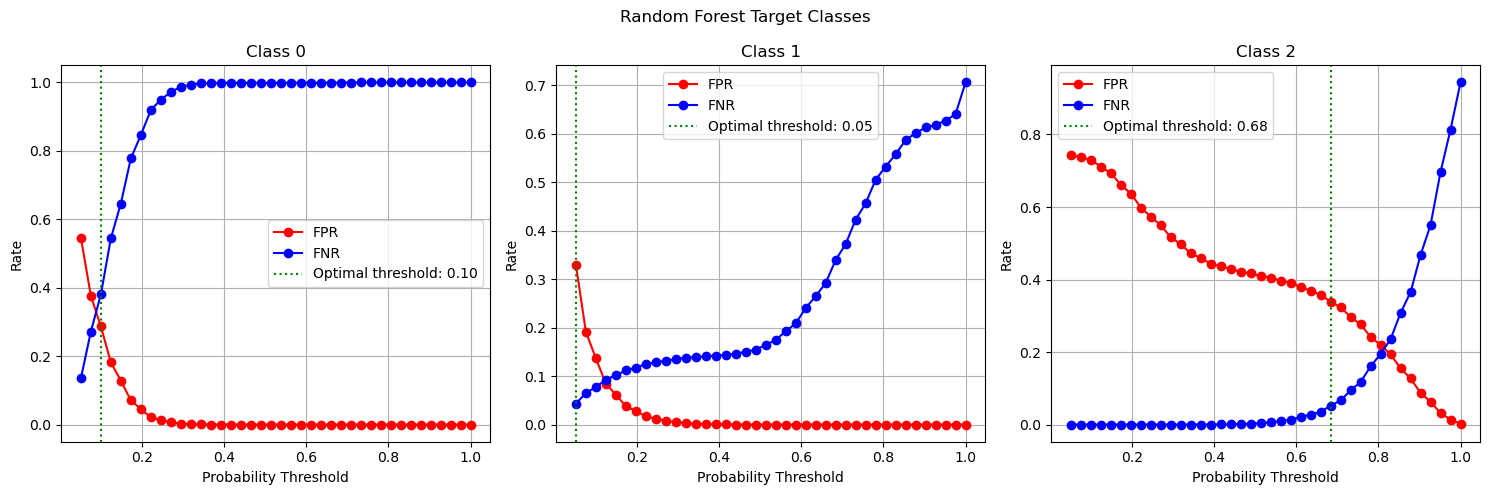

In [474]:
# Dictionaries to collect validation metrics for each class, for each fold.
valid_fnrs_folds = {i: [] for i in range(num_classes)}
valid_fnps_folds = {i: [] for i in range(num_classes)}

# Iterate over Stratified K-Fold cross-validation
for train_idx, valid_idx in skf.split(X_train_scaled, y_train_bin):
    X_train_fold = X_train_scaled.iloc[train_idx]
    X_valid_fold = X_train_scaled.iloc[valid_idx]
    y_train_fold = y_train_bin.iloc[train_idx]
    y_valid_fold = y_train_bin.iloc[valid_idx]
    
    # Fit the model on the training fold
    model_rf.fit(X_train_fold, y_train_fold)
    
    # Get predicted probabilities for the validation fold once per fold
    valid_probs = model_rf.predict_proba(X_valid_fold)  # shape: (n_samples, num_classes)
    
    # Temporary dictionaries to store metrics for each class in this fold.
    valid_fnrs_temp = {i: [] for i in range(num_classes)}
    valid_fnps_temp = {i: [] for i in range(num_classes)}
    
    # Loop over thresholds
    for threshold in thresholds:
        for i in range(num_classes):
            # Create a one-vs-all binary label: 1 if sample belongs to class i, else 0.
            y_valid_true_i = (y_valid_fold == i).astype(int)
            # For the prediction, threshold the probability for class i.
            y_valid_pred_i = (valid_probs[:, i] >= threshold).astype(int)
            
            # Compute confusion matrix for binary classification.
            cm = confusion_matrix(y_valid_true_i, y_valid_pred_i, labels=[0, 1])
            tn, fp, fn, tp = cm.ravel()
            
            # Calculate FNR and FPR safely (handle division by zero)
            FNR = fn / (fn + tp) if (fn + tp) > 0 else 0
            FPR = fp / (fp + tn) if (fp + tn) > 0 else 0
            
            valid_fnrs_temp[i].append(FNR)
            valid_fnps_temp[i].append(FPR)
    
    # Append results from this fold for each class
    for i in range(num_classes):
        valid_fnrs_folds[i].append(valid_fnrs_temp[i])
        valid_fnps_folds[i].append(valid_fnps_temp[i])

# Now average the metrics across folds for each threshold, for each class.
valid_fnrs_by_class = {}
valid_fnps_by_class = {}

for i in range(num_classes):
    valid_fnrs_by_class[i] = np.mean(np.array(valid_fnrs_folds[i]), axis=0)
    valid_fnps_by_class[i] = np.mean(np.array(valid_fnps_folds[i]), axis=0)

# Define an acceptable max FPR threshold
MAX_FPR_THRESHOLD = 0.35  # Adjust this to your tolerance level for false positives

optimal_thresholds = []

plt.figure(figsize=(15, 5))

for i in range(num_classes):
    plt.subplot(1, num_classes, i+1)
    
    # Plot FPR and FNR vs thresholds for each class
    plt.plot(thresholds, valid_fnps_by_class[i], marker='o', color='red', label='FPR')
    plt.plot(thresholds, valid_fnrs_by_class[i], marker='o', color='blue', label='FNR')
    
    # Determine the optimal threshold (prioritizing low FNR while controlling FPR)
    fnrs = np.array(valid_fnrs_by_class[i])
    fprs = np.array(valid_fnps_by_class[i])

    # Find indices where FPR is within the acceptable range
    valid_indices = np.where(fprs <= MAX_FPR_THRESHOLD)[0]

    if len(valid_indices) > 0:
        # Select the threshold with the lowest FNR within the valid FPR range
        idx_min_fn = valid_indices[np.argmin(fnrs[valid_indices])]
    else:
        # If no threshold meets the FPR constraint, just minimize FNR
        idx_min_fn = np.argmin(fnrs)
    
    opt_threshold = thresholds[idx_min_fn]
    optimal_thresholds.append(opt_threshold)
    
    # Mark the optimal threshold with a vertical line
    plt.axvline(opt_threshold, color='green', linestyle=':', 
                label=f'Optimal threshold: {opt_threshold:.2f}')
    
    plt.xlabel('Probability Threshold')
    plt.ylabel('Rate')
    plt.title(f'Class {i}')
    plt.legend()
    plt.grid(True)

plt.suptitle("Random Forest Target Classes")
plt.tight_layout()
plt.show()

In [475]:
###################################################################################################################3
# Train your final model on the training sub set
model_rf.fit(x_train_sub, y_train_sub)

# Predict probabilities on the test set
val_probs = model_rf.predict_proba(x_val)


# Get predictions using the custom thresholding rule
y_pred = predict_with_thresholds(val_probs, optimal_thresholds)

# Compute metrics
acc = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')


print("RANDOM FOREST RESULTS")
print("Validation results")
print("Accuracy:", acc)
print("Classification Report:\n", report)
print("Weighted F1 Score:", f1)



##########################################################################################
# Train your final model on the entire training set
model_rf.fit(X_train_scaled, y_train_bin)

# Predict probabilities on the test set
test_probs = model_rf.predict_proba(X_test_scaled)


# Get predictions using the custom thresholding rule
y_pred = predict_with_thresholds(test_probs, optimal_thresholds)

# Compute metrics
acc = accuracy_score(y_test_bin, y_pred)
report = classification_report(y_test_bin, y_pred)
f1 = f1_score(y_test_bin, y_pred, average='weighted')

print("Test results")
print("Accuracy:", acc)
print("Classification Report:\n", report)
print("Weighted F1 Score:", f1)

RANDOM FOREST RESULTS
Validation results
Accuracy: 0.8806882923944556
Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.11      0.14      4751
           1       0.86      0.88      0.87     10040
           2       0.91      0.95      0.93     54540

    accuracy                           0.88     69331
   macro avg       0.66      0.64      0.65     69331
weighted avg       0.86      0.88      0.87     69331

Weighted F1 Score: 0.8671763384044973
Test results
Accuracy: 0.8820271392965937
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.10      0.14      5892
           1       0.86      0.88      0.87     12580
           2       0.91      0.95      0.93     68192

    accuracy                           0.88     86664
   macro avg       0.66      0.64      0.65     86664
weighted avg       0.86      0.88      0.87     86664

Weighted F1 Score: 0.8679076059102787


<Figure size 800x600 with 0 Axes>

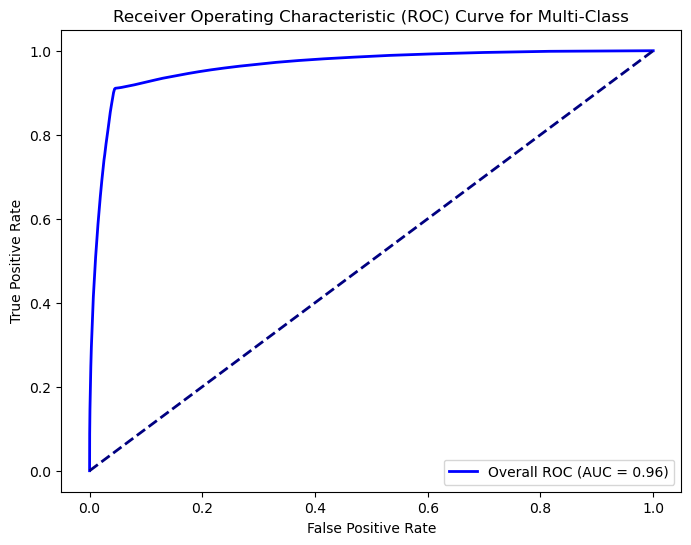

In [476]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier  # Example model
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize

# Number of classes
n_classes = 3

# Binarize the labels for multi-class classification (One-vs-Rest)
y_bin = label_binarize(y_val, classes=[0, 1, 2])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))


# Compute micro-average ROC curve and AUC
fpr, tpr, _ = roc_curve(y_bin.ravel(), val_probs.ravel())  # Flatten arrays
roc_auc = auc(fpr, tpr)

# Plot the micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Overall ROC (AUC = {roc_auc:.2f})')

# Plot the diagonal line (chance level)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Label and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show();


# Classification on Stroke

In [477]:
cat_cols.remove('diagosed_stroke3')
cat_cols.append('new_diabetes4')

comorbidities_cdc2023 = pd.get_dummies(comorbidities_cdc2023, columns=cat_cols, drop_first=False, dtype=int)


# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the numerical columns of the training set and transform them
comorbidities_cdc2023[num_cols] = scaler.fit_transform(comorbidities_cdc2023[num_cols])

# Check the results
print("Scaled Data:")
comorbidities_cdc2023.sample(5)

Scaled Data:


,phys_health,mental_health,diagosed_stroke3,age_diabetes4,children,avg_alco_per_day,times_Checked_glyco_hemoglobin,weight_pounds_clean,height_feet_inches_clean,alco_days_clean,...,prim_insurance_clean_8.0,prim_insurance_clean_9.0,prim_insurance_clean_10.0,new_diabetes4_0.0,new_diabetes4_1.0,new_diabetes4_2.0,new_diabetes4_3.0,new_diabetes4_4.0,new_diabetes4_7.0,new_diabetes4_9.0
89020,1.101101,1.176593,2.0,0.007095,0.030027,-0.563231,-0.116579,-1.664243,-1.709820,-0.577105,...,0,0,0,0,0,0,1,0,0,0
373918,-0.499847,-0.517541,2.0,0.007095,0.030027,0.509489,-0.116579,0.126142,1.698109,3.196385,...,0,0,0,0,0,0,1,0,0,0
314950,-0.271140,-0.517541,2.0,0.007095,0.030027,0.509489,-0.116579,0.722937,0.724415,-0.038035,...,0,0,0,0,0,0,1,0,0,0
27169,-0.499847,-0.517541,2.0,0.007095,0.030027,-0.563231,-0.116579,0.612419,-0.249279,-0.577105,...,0,0,0,0,0,0,1,0,0,0
64396,0.071920,-0.154512,2.0,-1.877182,0.030027,0.509489,-0.116579,-0.338032,-0.249279,2.118245,...,0,0,0,0,1,0,0,0,0,0


In [478]:
comorbidities_cdc2023['diagosed_stroke3'].value_counts()

diagosed_stroke3
2.0    413496
1.0     18350
7.0      1212
9.0       256
0.0         4
Name: count, dtype: int64

In [479]:
# Checking if 7 (Don't know/Not sure) and 9 (refused) exist in the dataset
if comorbidities_cdc2023['diagosed_stroke3'].isin([0, 7, 9]).any():
    # if 7 and 9 exist, replace as missing
    comorbidities_cdc2023['diagosed_stroke3'] = comorbidities_cdc2023['diagosed_stroke3'].replace({0 : np.nan, 7 : np.nan, 9 : np.nan})


# filling with mode of feature
comorbidities_cdc2023['diagosed_stroke3'] = comorbidities_cdc2023['diagosed_stroke3'].fillna(comorbidities_cdc2023['diagosed_stroke3'].mode().iloc[0])

comorbidities_cdc2023['diagosed_stroke3'].value_counts()

C:\Users\ekf98\AppData\Local\Temp\ipykernel_19792\2089464787.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  comorbidities_cdc2023['diagosed_stroke3'] = comorbidities_cdc2023['diagosed_stroke3'].replace({0 : np.nan, 7 : np.nan, 9 : np.nan})


diagosed_stroke3
2.0    414968
1.0     18350
Name: count, dtype: int64

In [480]:
# Split the dataset into 80% training and 20% testing sets
train, test = train_test_split(comorbidities_cdc2023, test_size=0.20, random_state=42)

# Check the shapes of the splits
print("Training set shape:", train.shape)
print("Test set shape:", test.shape)

Training set shape: (346654, 251)
Test set shape: (86664, 251)


In [481]:
y_train_bin = train['diagosed_stroke3']
y_test_bin = test['diagosed_stroke3']

x_train = train.drop(columns='diagosed_stroke3', axis=1)
x_test = test.drop(columns='diagosed_stroke3', axis=1)

x_test.head()

,phys_health,mental_health,age_diabetes4,children,avg_alco_per_day,times_Checked_glyco_hemoglobin,weight_pounds_clean,height_feet_inches_clean,alco_days_clean,final_dispcode_1100.0,...,prim_insurance_clean_8.0,prim_insurance_clean_9.0,prim_insurance_clean_10.0,new_diabetes4_0.0,new_diabetes4_1.0,new_diabetes4_2.0,new_diabetes4_3.0,new_diabetes4_4.0,new_diabetes4_7.0,new_diabetes4_9.0
259445,0.300627,0.087507,0.007095,0.030027,1.045849,-0.116579,0.833454,0.967838,0.501035,1,...,0,0,0,0,0,0,1,0,0,0
225244,-0.499847,3.112747,0.007095,0.030027,-0.563231,-0.116579,2.049148,-0.005856,-0.577105,0,...,0,0,0,0,0,0,0,1,0,0
327895,-0.271140,0.692555,0.007095,0.030027,-0.563231,-0.116579,0.170349,-1.466397,-0.577105,1,...,0,0,0,0,0,1,0,0,0,0
67353,1.101101,3.112747,0.007095,-1.747214,-0.563231,-0.116579,-0.271722,-0.249279,-0.577105,1,...,0,0,0,0,0,0,1,0,0,0
141003,-0.271140,-0.033503,0.007095,-1.747214,-0.026871,-0.116579,-1.266380,0.237568,1.309640,1,...,0,0,0,0,0,1,0,0,0,0


# Stroke Classification

# Without Accounting For Class Imbalances

In [482]:
# Map labels: 1 → 0, 2 → 1 (just for the model)
y_train_bin = y_train_bin.replace({1: 0, 2: 1})
y_test_bin = y_test_bin.replace({1: 0, 2: 1})

C:\Users\ekf98\AppData\Local\Temp\ipykernel_19792\2560768256.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y_train_bin = y_train_bin.replace({1: 0, 2: 1})
C:\Users\ekf98\AppData\Local\Temp\ipykernel_19792\2560768256.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y_test_bin = y_test_bin.replace({1: 0, 2: 1})


# XGBoost Classification

In [483]:
model_xg_boost = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', objective='multi:softmax', num_class=2)

cv_xgboost_results = cross_validate(model_xg_boost, x_train, y_train_bin, cv=skf, scoring=scoring, n_jobs=-1)



print(f"xgboost cross-validated results: - Accuracy: {np.mean(cv_xgboost_results['test_accuracy']):.4f}, "
        f"Precision: {np.mean(cv_xgboost_results['test_precision']):.4f}, "
        f"Recall: {np.mean(cv_xgboost_results['test_recall']):.4f}, "
        f"F1: {np.mean(cv_xgboost_results['test_f1']):.4f}")
print("---------------------------------------------------")


# Train the model on the full training set
model_xg_boost.fit(x_train, y_train_bin)

y_test_pred_xgboost = model_xg_boost.predict(x_test)


# Compute metrics
acc = accuracy_score(y_test_bin, y_test_pred_xgboost)
report = classification_report(y_test_bin, y_test_pred_xgboost)
matrix = confusion_matrix(y_test_bin, y_test_pred_xgboost)
f1 = f1_score(y_test_bin, y_test_pred_xgboost, average='weighted')


print("Test results")
print("Accuracy:", acc)
print("Classification Report:\n", report)
print("Weighted F1 Score:", f1)
print("Confusion Matrix Report:\n", matrix)

xgboost cross-validated results: - Accuracy: 0.9570, Precision: 0.6436, Recall: 0.5073, F1: 0.5042
---------------------------------------------------


c:\Users\ekf98\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:46:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test results
Accuracy: 0.9571679128588572
Classification Report:
               precision    recall  f1-score   support

         0.0       0.39      0.02      0.03      3679
         1.0       0.96      1.00      0.98     82985

    accuracy                           0.96     86664
   macro avg       0.68      0.51      0.50     86664
weighted avg       0.93      0.96      0.94     86664

Weighted F1 Score: 0.9379287415824211
Confusion Matrix Report:
 [[   61  3618]
 [   94 82891]]


# Random Forest Classification

In [484]:
model_rf = RandomForestClassifier(n_jobs=-1)

cv_rf_results = cross_validate(model_rf, x_train, y_train_bin, cv=skf, scoring=scoring, n_jobs=-1)


print(f"Random Forest - Accuracy: {np.mean(cv_rf_results['test_accuracy']):.4f}, "
        f"Precision: {np.mean(cv_rf_results['test_precision']):.4f}, "
        f"Recall: {np.mean(cv_rf_results['test_recall']):.4f}, "
        f"F1: {np.mean(cv_rf_results['test_f1']):.4f}")
print("---------------------------------------------------")


# Train the model on the full training set
model_rf.fit(x_train, y_train_bin)

y_test_prob = model_rf.predict_proba(x_test)

y_test_pred_rf = model_rf.predict(x_test)


# Compute metrics
acc = accuracy_score(y_test_bin, y_test_pred_rf)
report = classification_report(y_test_bin, y_test_pred_rf)
matrix = confusion_matrix(y_test_bin, y_test_pred_rf)
f1 = f1_score(y_test_bin, y_test_pred_rf, average='weighted')


print("Test results")
print("Accuracy:", acc)
print("Classification Report:\n", report)
print("Weighted F1 Score:", f1)
print("Confusion Matrix Report:\n", matrix)

Random Forest - Accuracy: 0.9577, Precision: 0.8278, Recall: 0.5006, F1: 0.4905
---------------------------------------------------
Test results
Accuracy: 0.9575833102557002
Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.00      0.00      3679
         1.0       0.96      1.00      0.98     82985

    accuracy                           0.96     86664
   macro avg       0.84      0.50      0.49     86664
weighted avg       0.95      0.96      0.94     86664

Weighted F1 Score: 0.9369145849588354
Confusion Matrix Report:
 [[    5  3674]
 [    2 82983]]


# Optimizing Around False Negative Rates With Optimal Threshold

In [485]:
def fast_balanced_threshold(y_true, y_scores,  max_fpr, num_thresholds=200):
    # Ensure 1D arrays
    y_true = np.ravel(y_true)
    y_scores = np.ravel(y_scores)

    thresholds = np.linspace(0, 1, num_thresholds)
    preds = (y_scores[:, np.newaxis] >= thresholds).astype(int)  # shape: (n_samples, n_thresholds)

    # Correct confusion matrix calculations
    fn = ((y_true[:, np.newaxis] == 0) & (preds == 1)).sum(axis=0)
    tp = ((y_true[:, np.newaxis] == 0) & (preds == 0)).sum(axis=0)
    fp = ((y_true[:, np.newaxis] == 1) & (preds == 0)).sum(axis=0)
    tn = ((y_true[:, np.newaxis] == 1) & (preds == 1)).sum(axis=0)

    fpr = fp / (fp + tn + 1e-8)
    fnr = fn / (fn + tp + 1e-8)

    # Only consider thresholds where FPR is below the maximum allowed
    valid_idxs = np.where(fpr <= max_fpr)[0]

    if len(valid_idxs) == 0:
        raise ValueError(f"No threshold found with FPR ≤ {max_fpr:.2f}")

    # Find the index among valid thresholds that minimizes |FPR - FNR|
    best_idx = valid_idxs[np.argmin(np.abs(fpr[valid_idxs] - fnr[valid_idxs]))]
    best_threshold = thresholds[best_idx]

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, fpr, label="FPR", color='red')
    plt.plot(thresholds, fnr, label="FNR", color='blue')
    plt.axvline(best_threshold, linestyle='--', color='black', label=f'Best Threshold = {best_threshold:.2f}')
    plt.xlabel('Threshold')
    plt.ylabel('Error Rate')
    plt.title('FPR vs FNR')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return best_threshold, fpr[best_idx], fnr[best_idx]


# XGBoost Classification

c:\Users\ekf98\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:48:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


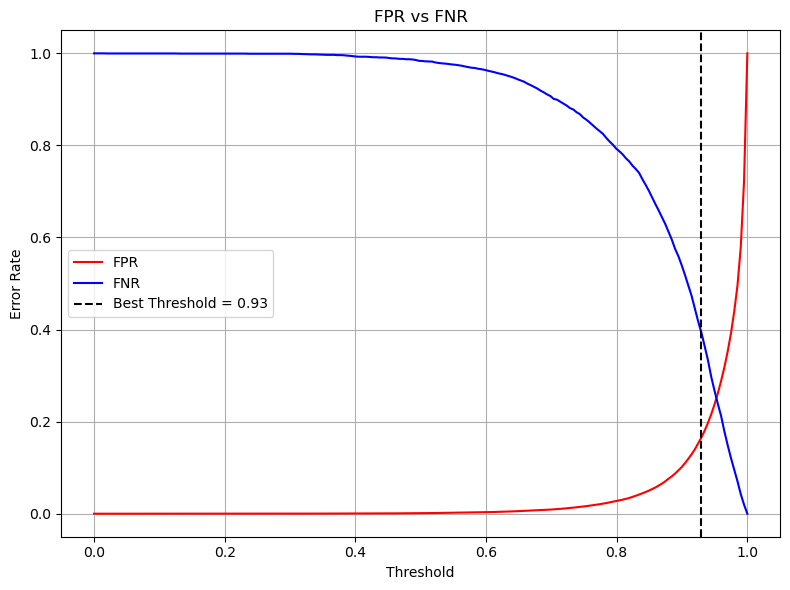

0.16557209134178882 0.3933134003794691
Test results
Accuracy: 0.8247599926151574
Classification Report:
               precision    recall  f1-score   support

         0.0       0.14      0.61      0.23      3679
         1.0       0.98      0.83      0.90     82985

    accuracy                           0.82     86664
   macro avg       0.56      0.72      0.56     86664
weighted avg       0.94      0.82      0.87     86664

Weighted F1 Score: 0.8725631602302497
Confusion Matrix Report:
 [[ 2232  1447]
 [13740 69245]]


In [486]:
##########################################################################################
# Train your final model on the entire training set
model_xg_boost.fit(x_train, y_train_bin)

# Predict probabilities on the test set
test_probs = model_xg_boost.predict_proba(x_test)[:, 1]

threshold, fpr_val, fnr_val = fast_balanced_threshold(y_test_bin, test_probs, max_fpr=0.17)

# 0.12 0.16

print(fpr_val, fnr_val)


y_test_pred = (test_probs >= threshold).astype(int)

# Compute metrics
acc = accuracy_score(y_test_bin, y_test_pred)
report = classification_report(y_test_bin, y_test_pred)
matrix = confusion_matrix(y_test_bin, y_test_pred)
f1 = f1_score(y_test_bin, y_test_pred, average='weighted')


print("Test results")
print("Accuracy:", acc)
print("Classification Report:\n", report)
print("Weighted F1 Score:", f1)
print("Confusion Matrix Report:\n", matrix)

# Random Forest Classification

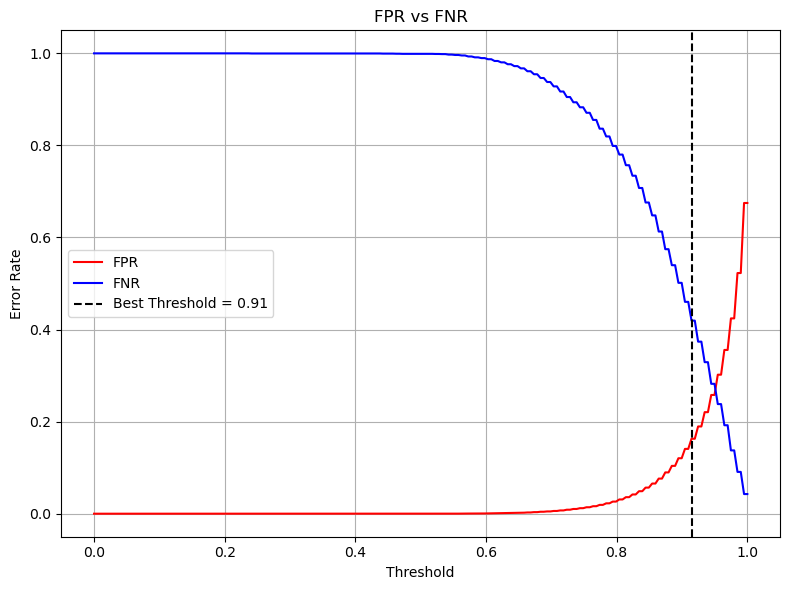

0.16283665722719012 0.41940744767485894
Test results
Accuracy: 0.8262715775870026
Classification Report:
               precision    recall  f1-score   support

         0.0       0.14      0.58      0.22      3679
         1.0       0.98      0.84      0.90     82985

    accuracy                           0.83     86664
   macro avg       0.56      0.71      0.56     86664
weighted avg       0.94      0.83      0.87     86664

Weighted F1 Score: 0.8733156275715722
Confusion Matrix Report:
 [[ 2136  1543]
 [13513 69472]]


In [487]:
##########################################################################################
# Train your final model on the entire training set
model_rf.fit(x_train, y_train_bin)

# Predict probabilities on the test set
test_probs = model_rf.predict_proba(x_test)[:, 1]

threshold, fpr_val, fnr_val = fast_balanced_threshold(y_test_bin, test_probs, max_fpr=0.17)

# 0.20

print(fpr_val, fnr_val)

y_test_pred = (test_probs >= threshold).astype(int)

# Compute metrics
acc = accuracy_score(y_test_bin, y_test_pred)
report = classification_report(y_test_bin, y_test_pred)
matrix = confusion_matrix(y_test_bin, y_test_pred)
f1 = f1_score(y_test_bin, y_test_pred, average='weighted')


print("Test results")
print("Accuracy:", acc)
print("Classification Report:\n", report)
print("Weighted F1 Score:", f1)
print("Confusion Matrix Report:\n", matrix)

In [488]:

# # Define evaluation metrics (using macro averaging to account for imbalanced classes)
# scoring = {
#     'accuracy': 'accuracy',
#     'precision': 'precision_macro',
#     'recall': 'recall_macro',
#     'f1': 'f1_macro'
# }

# # Use Stratified K-Fold cross-validation to preserve class imbalance in the binary target
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Define baseline models for binary classification.
# # Note: These models will now learn to distinguish between:
# #    1 (diabetes; includes values originally 1 and 2) 2 (all other categories) and 0 (prediabetes; originally 4)
# models = {
#     'LogisticRegression': LogisticRegression(max_iter=1000, class_weight='balanced', multi_class='multinomial', solver='lbfgs'),
#     # 'SVM': SVC(class_weight='balanced', probability=True, decision_function_shape='ovr'),  # Set probability=True for soft voting # SVM is not good for large datasets (requires excessive optimisation and may still not work well)
#     'RandomForest': RandomForestClassifier(class_weight='balanced', n_jobs=-1),
#     'NaiveBayes': GaussianNB(),
#     'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', objective='multi:softmax', num_class=3),
#     'NeuralNetwork': MLPClassifier(max_iter=500)
# }

# # Use binary training data (preprocessed features and recoded binary target)
# # X_train_bin: training features after scaling and encoding
# # y_train_bin: binary target variable where 1 indicates diabetes and 0 indicates prediabetes

# results = {}

# print("Baseline Models Evaluation:")
# for name, model in models.items():
#     print(f"Evaluating {name}...")
#     cv_results = cross_validate(model, X_train_scaled, y_train_bin, cv=skf, scoring=scoring, n_jobs=-1)
#     results[name] = cv_results
#     print(f"{name} - Accuracy: {np.mean(cv_results['test_accuracy']):.4f}, "
#           f"Precision: {np.mean(cv_results['test_precision']):.4f}, "
#           f"Recall: {np.mean(cv_results['test_recall']):.4f}, "
#           f"F1: {np.mean(cv_results['test_f1']):.4f}")
#     print("---------------------------------------------------")

# # Define ensemble models.
# # Here we include all baseline models (including NaiveBayes, since GaussianNB supports predict_proba)
# estimators = [
#     ('lr', models['LogisticRegression']),
#     # ('svc', models['SVM']),
#     ('rf', models['RandomForest']),
#     ('xgb', models['XGBoost']),
#     ('nn', models['NeuralNetwork']),
#     ('nb', models['NaiveBayes'])
# ]

# # Voting Classifier (using soft voting so that probabilities are averaged)
# voting_clf = VotingClassifier(estimators=estimators, voting='soft')

# # Stacking Classifier with Logistic Regression as the meta-classifier
# stacking_clf = StackingClassifier(estimators=estimators,
#                                   final_estimator=LogisticRegression(max_iter=1000, class_weight='balanced', multi_class='multinomial', solver='lbfgs'))

# ensemble_models = {
#     'VotingClassifier': voting_clf,
#     'StackingClassifier': stacking_clf
# }

# print("Ensemble Models Evaluation:")
# for name, model in ensemble_models.items():
#     print(f"Evaluating {name}...")
#     cv_results = cross_validate(model, X_train_scaled, y_train_bin, cv=skf, scoring=scoring, n_jobs=-1)
#     results[name] = cv_results
#     print(f"{name} - Accuracy: {np.mean(cv_results['test_accuracy']):.4f}, "
#           f"Precision: {np.mean(cv_results['test_precision']):.4f}, "
#           f"Recall: {np.mean(cv_results['test_recall']):.4f}, "
#           f"F1: {np.mean(cv_results['test_f1']):.4f}")
#     print("---------------------------------------------------")